In [1]:
import scanpy as sc
import squidpy as sq

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
import sys
sys.path.append('/home/augusta/SSS_mount/insituCNV/InSituCNV/modules')
sys.path

['/home/augusta/anaconda3/envs/scanpy_env/lib/python310.zip',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10/lib-dynload',
 '',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10/site-packages',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/setuptools/_vendor',
 '/home/augusta/SSS_mount/insituCNV/InSituCNV/modules']

# Load adata

In [3]:
adata_path = "/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/01_Simulate_CNVs_in_spatial_data/Simulate_CNVs_vascular_normal/lung_organoids_simulatedCNVs_121224_simulationv2_rho6_v2"
adata = sc.read_h5ad(adata_path)

In [4]:
# adata = adata[adata.obs.cell_type == 'basal cell']

In [5]:
adata.obs.cell_type

N3_O1_AAACCCAAGCGTCAAG-1       secretory cell
N3_O1_AAACCCACACTAGGTT-1       secretory cell
N3_O1_AAACCCACAGTTGTCA-1           basal cell
N3_O1_AAACGAATCCAGTACA-1       secretory cell
N3_O1_AAACGCTTCTGGGCGT-1           basal cell
                                    ...      
N3_ALIEX_TTTGATCTCAATCGGT-1    secretory cell
N3_ALIEX_TTTGGAGCAAGCAGGT-1     ciliated cell
N3_ALIEX_TTTGGTTGTATACCCA-1    secretory cell
N3_ALIEX_TTTGGTTTCTGAATGC-1    secretory cell
N3_ALIEX_TTTGTTGGTCGCATGC-1    secretory cell
Name: cell_type, Length: 8892, dtype: category
Categories (3, object): ['ciliated cell', 'secretory cell', 'basal cell']

In [6]:
import numpy as np
adata.layers['zero'] = np.zeros(adata.X.shape)

In [7]:
adata

AnnData object with n_obs × n_vars = 8892 × 25691
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'model_id', 'sample_id', 'Phase', 'level_1', 'level_2', 'level_3', 'CountUMIs', 'CountGenes', 'X.Mitochondrial', 'NoveltyScore', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'simulated_subclone'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_b

In [8]:
print(adata.X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 66535522 stored elements and shape (8892, 25691)>
  Coords	Values
  (0, 12)	0.35992313941981946
  (0, 16)	0.6240320718847302
  (0, 17)	0.35992313941981946
  (0, 18)	0.35992313941981946
  (0, 26)	0.6240320718847302
  (0, 29)	0.35992313941981946
  (0, 32)	0.35992313941981946
  (0, 34)	0.35992313941981946
  (0, 39)	1.3943951523923366
  (0, 42)	1.0053549037577747
  (0, 48)	0.35992313941981946
  (0, 51)	0.6240320718847302
  (0, 58)	0.35992313941981946
  (0, 64)	1.5890256465019603
  (0, 66)	0.35992313941981946
  (0, 70)	0.35992313941981946
  (0, 77)	0.35992313941981946
  (0, 79)	0.8327603104677352
  (0, 80)	0.35992313941981946
  (0, 86)	0.35992313941981946
  (0, 89)	0.35992313941981946
  (0, 109)	2.2684474836594384
  (0, 111)	0.35992313941981946
  (0, 112)	0.6240320718847302
  (0, 121)	0.6240320718847302
  :	:
  (8891, 23224)	0.19467800669370497
  (8891, 23335)	0.0
  (8891, 23487)	0.19467800669370497
  (8891, 23547)	0.497593979850

In [9]:
print(adata.layers['counts'])

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 66535522 stored elements and shape (8892, 25691)>
  Coords	Values
  (0, 12)	1.0
  (0, 16)	2.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 26)	2.0
  (0, 29)	1.0
  (0, 32)	1.0
  (0, 34)	1.0
  (0, 39)	7.0
  (0, 42)	4.0
  (0, 48)	1.0
  (0, 51)	2.0
  (0, 58)	1.0
  (0, 64)	9.0
  (0, 66)	1.0
  (0, 70)	1.0
  (0, 77)	1.0
  (0, 79)	3.0
  (0, 80)	1.0
  (0, 86)	1.0
  (0, 89)	1.0
  (0, 109)	20.0
  (0, 111)	1.0
  (0, 112)	2.0
  (0, 121)	2.0
  :	:
  (8891, 23224)	1.0
  (8891, 23335)	0.0
  (8891, 23487)	1.0
  (8891, 23547)	3.0
  (8891, 23593)	1.0
  (8891, 23611)	1.0
  (8891, 23624)	4.0
  (8891, 23776)	12.0
  (8891, 23856)	1.0
  (8891, 24003)	1.0
  (8891, 24045)	2.0
  (8891, 24213)	1.0
  (8891, 24317)	1.0
  (8891, 24861)	1.0
  (8891, 24867)	2.0
  (8891, 24943)	2.0
  (8891, 24969)	1.0
  (8891, 25018)	1.0
  (8891, 25023)	2.0
  (8891, 25105)	2.0
  (8891, 25185)	1.0
  (8891, 25311)	2.0
  (8891, 25398)	1.0
  (8891, 25582)	1.0
  (8891, 25601)	1.0


# Preprocessing

In [5]:
sc.pp.normalize_total(adata, layer='CNV_simulated')
sc.pp.log1p(adata, layer='CNV_simulated')

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
import warnings
import numpy as np
from scipy.sparse import csr_matrix, issparse
from scvelo import logging as logg
from scvelo import settings
from scvelo.preprocessing.neighbors import get_connectivities, get_n_neighs, neighbors, verify_neighbors
from scvelo.preprocessing.utils import normalize_per_cell, not_yet_normalized


def moments(
    data,
    n_neighbors=200,
    n_pcs=None,
    mode="connectivities",
    method="umap",
    use_rep=None,
    use_highly_variable=True,
    copy=False,
):
    """Computes moments for velocity estimation.

    First-/second-order moments are computed for each cell across its nearest neighbors,
    where the neighbor graph is obtained from euclidean distances in PCA space.

    Arguments:
    ---------
    data: :class:`~anndata.AnnData`
        Annotated data matrix.
    n_neighbors: `int` (default: 30)
        Number of neighbors to use.
    n_pcs: `int` (default: None)
        Number of principal components to use.
        If not specified, the full space is used of a pre-computed PCA,
        or 30 components are used when PCA is computed internally.
    mode: `'connectivities'` or `'distances'`  (default: `'connectivities'`)
        Distanceadata.obs['ROI_status'] metric to use for moment computation.
    method : {{'umap', 'hnsw', 'sklearn', `None`}}  (default: `'umap'`)
        Method to compute neighbors, only differs in runtime.
        Connectivities are computed with adaptive kernel width as proposed in
        Haghverdi et al. 2016 (https://doi.org/10.1038/nmeth.3971).
    use_rep : `None`, `'X'` or any key for `.obsm` (default: None)
        Use the indicated representation. If `None`, the representation is chosen
        automatically: for .n_vars < 50, .X is used, otherwise ‘X_pca’ is used.
    use_highly_variable: `bool` (default: True)
        Whether to use highly variable genes only, stored in .var['highly_variable'].
    copy: `bool` (default: `False`)
        Return a copy instead of writing to adata.

    Returns
    -------
    Ms: `.layers`
        dense matrix with first order moments of spliced counts.
    Mu: `.layers`
        dense matrix with first order moments of unspliced counts.
    """
    adata = data.copy() if copy else data

    layers = [layer for layer in {"raw"} if layer in adata.layers]
    if any([not_yet_normalized(adata.layers[layer]) for layer in layers]):
        normalize_per_cell(adata)

    if n_neighbors is not None and n_neighbors > get_n_neighs(adata):
        warnings.warn(
            "Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version "
            "of scVelo. Please compute neighbors first with Scanpy.",
            DeprecationWarning,
            stacklevel=2,
        )
        neighbors(
            adata,
            n_neighbors=n_neighbors,
            use_rep=use_rep,
            use_highly_variable=use_highly_variable,
            n_pcs=n_pcs,
            method=method,
        )
    verify_neighbors(adata)

    if "spliced" not in adata.layers.keys() or "unspliced" not in adata.layers.keys():
        logg.info(f"computing moments based on {mode}", r=True)
        connectivities = get_connectivities(
            adata, mode, n_neighbors=n_neighbors, recurse_neighbors=False
        )
        adata.layers["Ms"] = (
            csr_matrix.dot(connectivities, csr_matrix(adata.layers["raw"]))
            .astype(np.float32)
            .toarray()
        )
    return adata if copy else None

In [11]:
adata.layers['logcounts'] = adata.X.copy()

In [12]:
adata.layers['raw'] = adata.layers['CNV_simulated'].copy()

In [13]:
adata.X = adata.layers['raw'].copy()

In [14]:
moments(adata, n_neighbors=30)

computing neighbors
    finished (0:00:25) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities


In [21]:
print(adata.X)

[[0.0625     0.04166667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.09677419 0.19354838 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02777778 0.         ... 0.02777778 0.         0.        ]
 [0.0625     0.0625     0.         ... 0.02083333 0.         0.        ]
 [0.20000002 0.20000002 0.         ... 0.025      0.         0.        ]]


# inferCNV

In [15]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

sc.settings.set_figure_params(figsize=(5, 5))

### Zero

In [12]:
adata.X = adata.layers['zero'].copy()

In [13]:
cnv.tl.infercnv(
    adata,
    window_size=100
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]


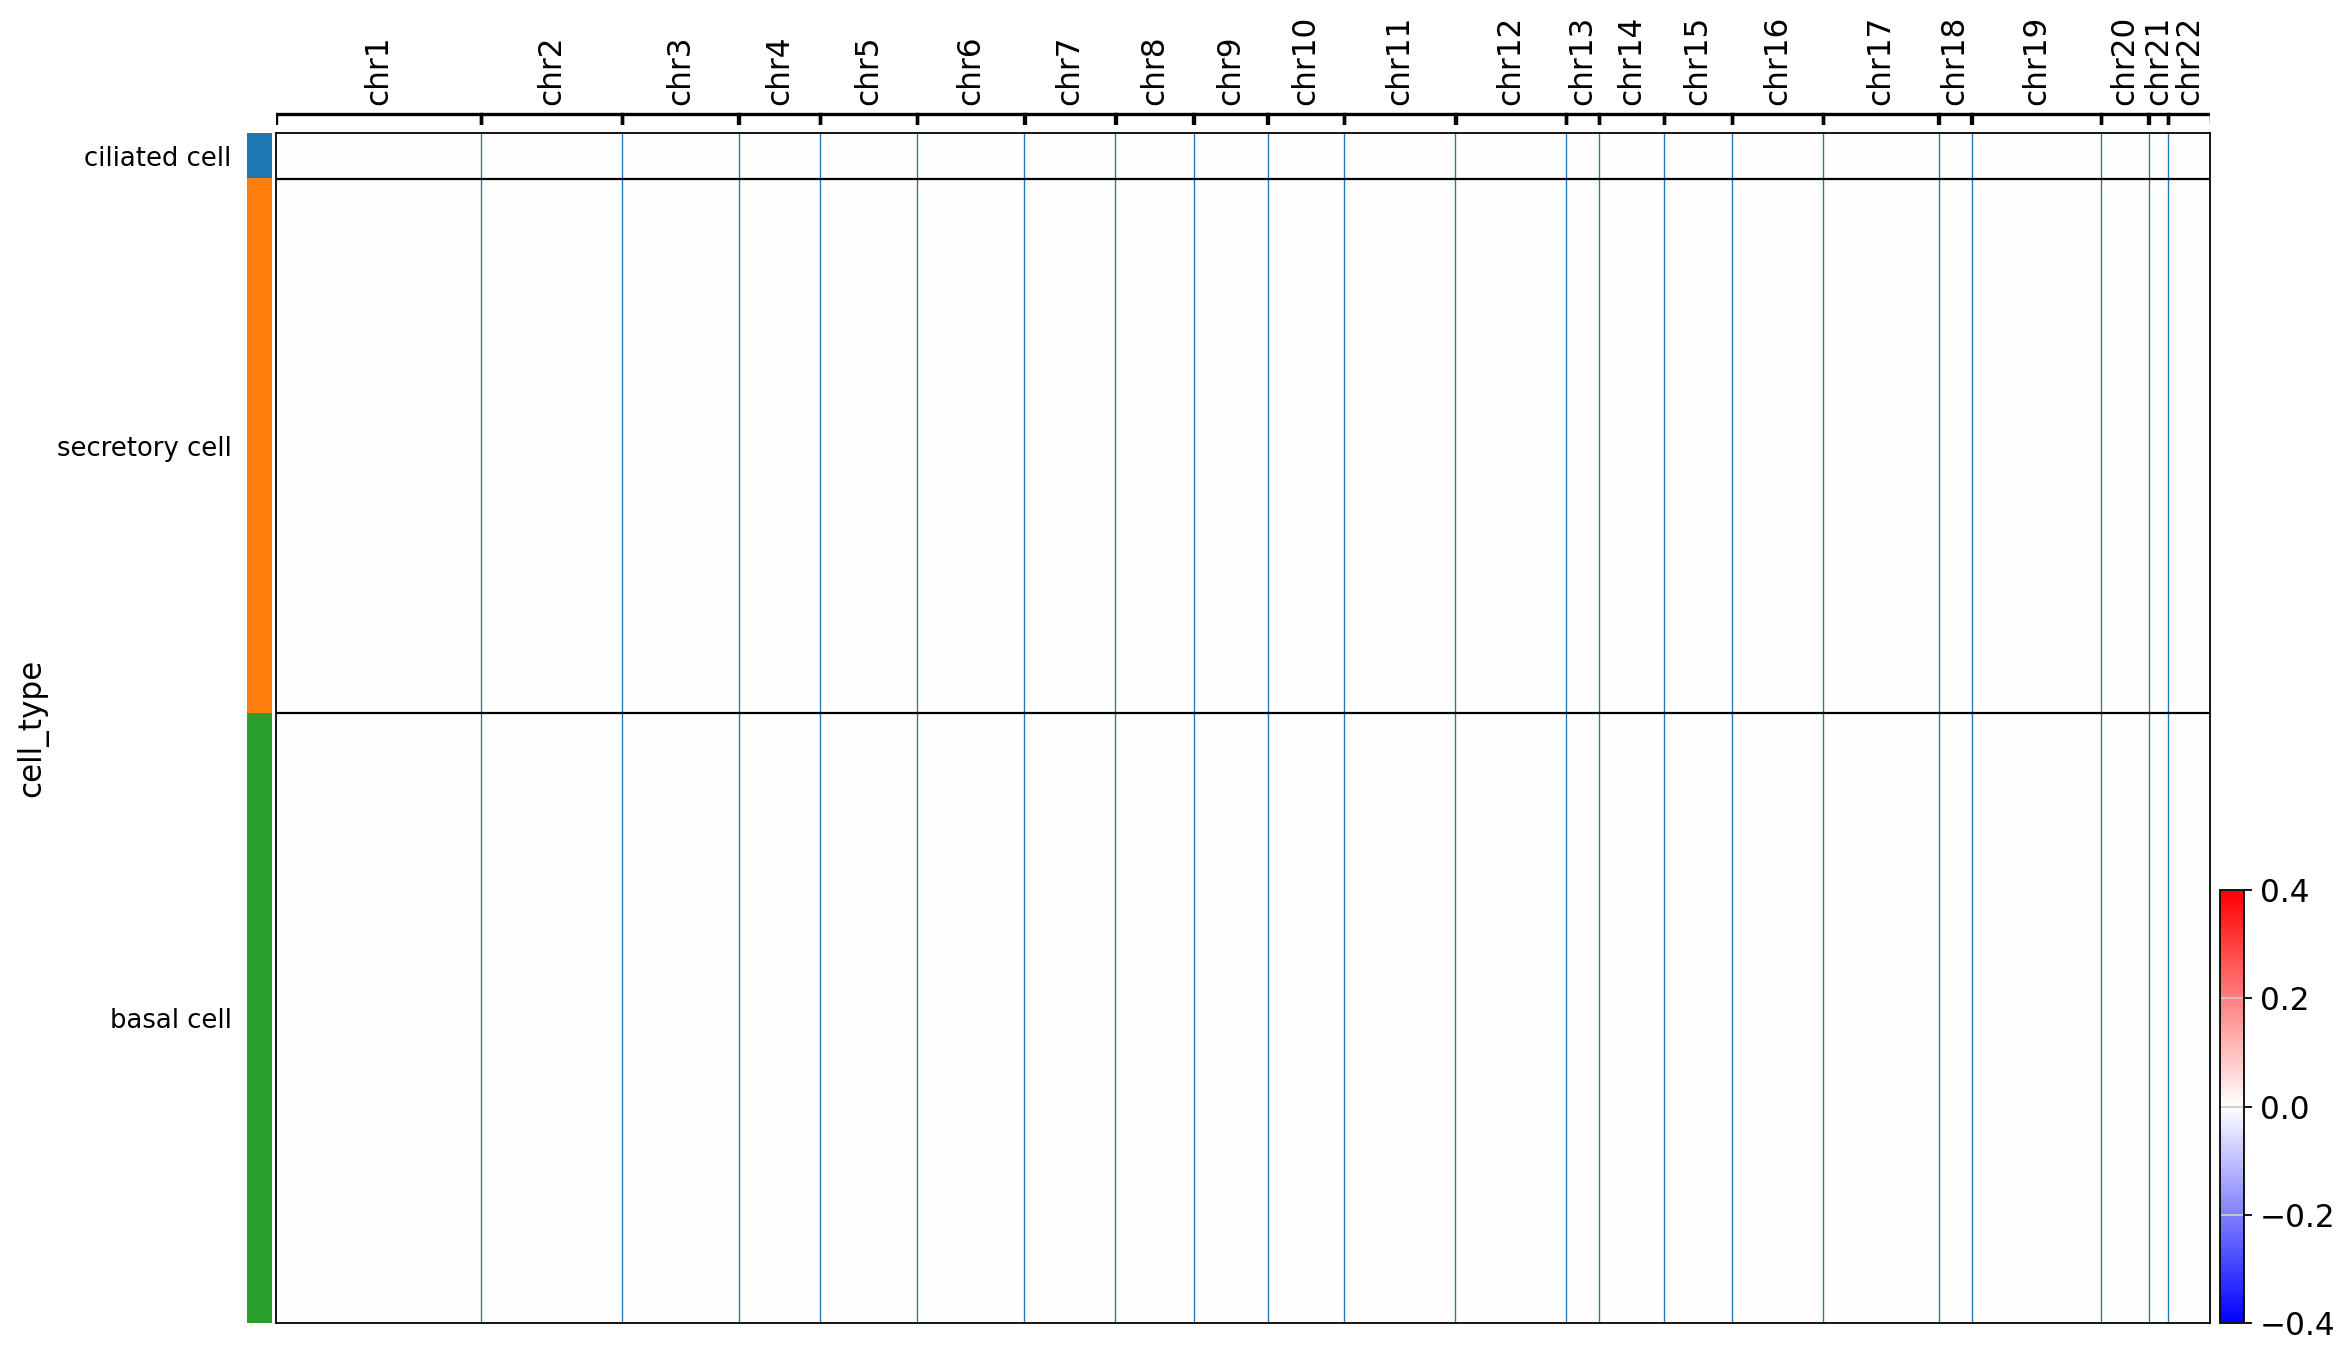

In [15]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmax=0.4, vmin=-0.4)

### GT

In [43]:
adata.X = adata.layers['CNV_GT'].copy()

In [44]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    reference_key="simulated_subclone",
    reference_cat="N",
    window_size=100
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.08s/it]


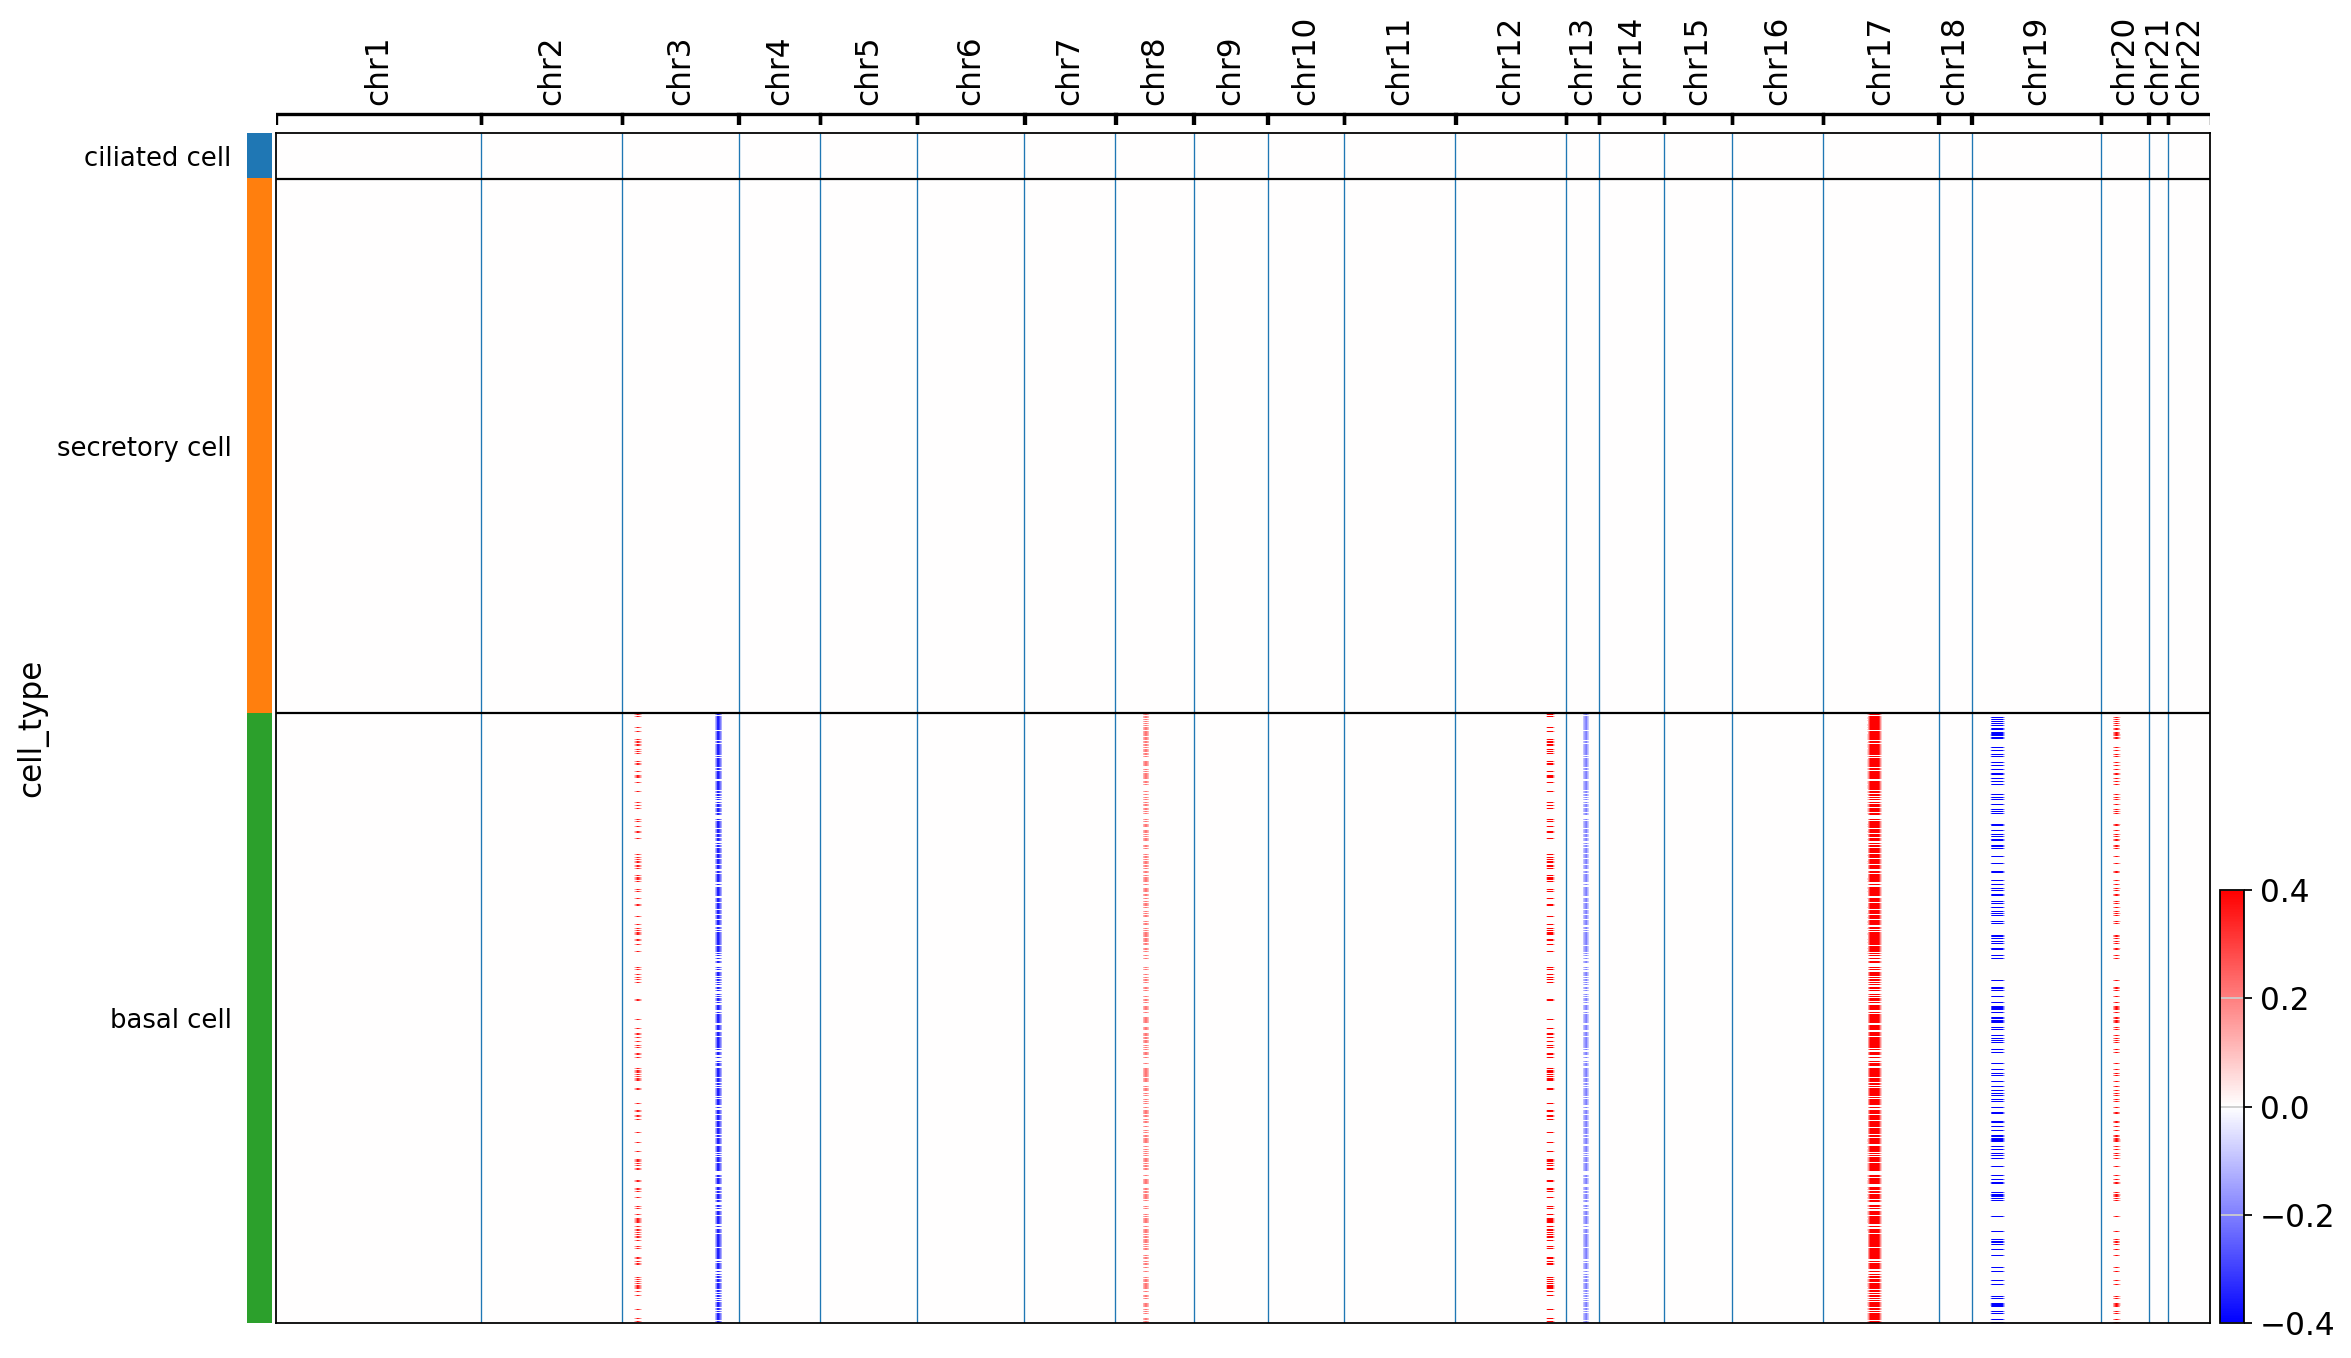

In [45]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmax=0.4, vmin=-0.4)

In [46]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

In [59]:
cnv.tl.leiden(adata, resolution=0.01, key_added='cnv_leiden_res0.01')

In [60]:
adata

AnnData object with n_obs × n_vars = 8892 × 25691
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'model_id', 'sample_id', 'Phase', 'level_1', 'level_2', 'level_3', 'CountUMIs', 'CountGenes', 'X.Mitochondrial', 'NoveltyScore', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'simulated_subclone', 'cnv_leiden', 'cnv_score', 'cnv_leiden_res0.01'
    var: 'gene_symbols', 'feature_is_filtered'

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


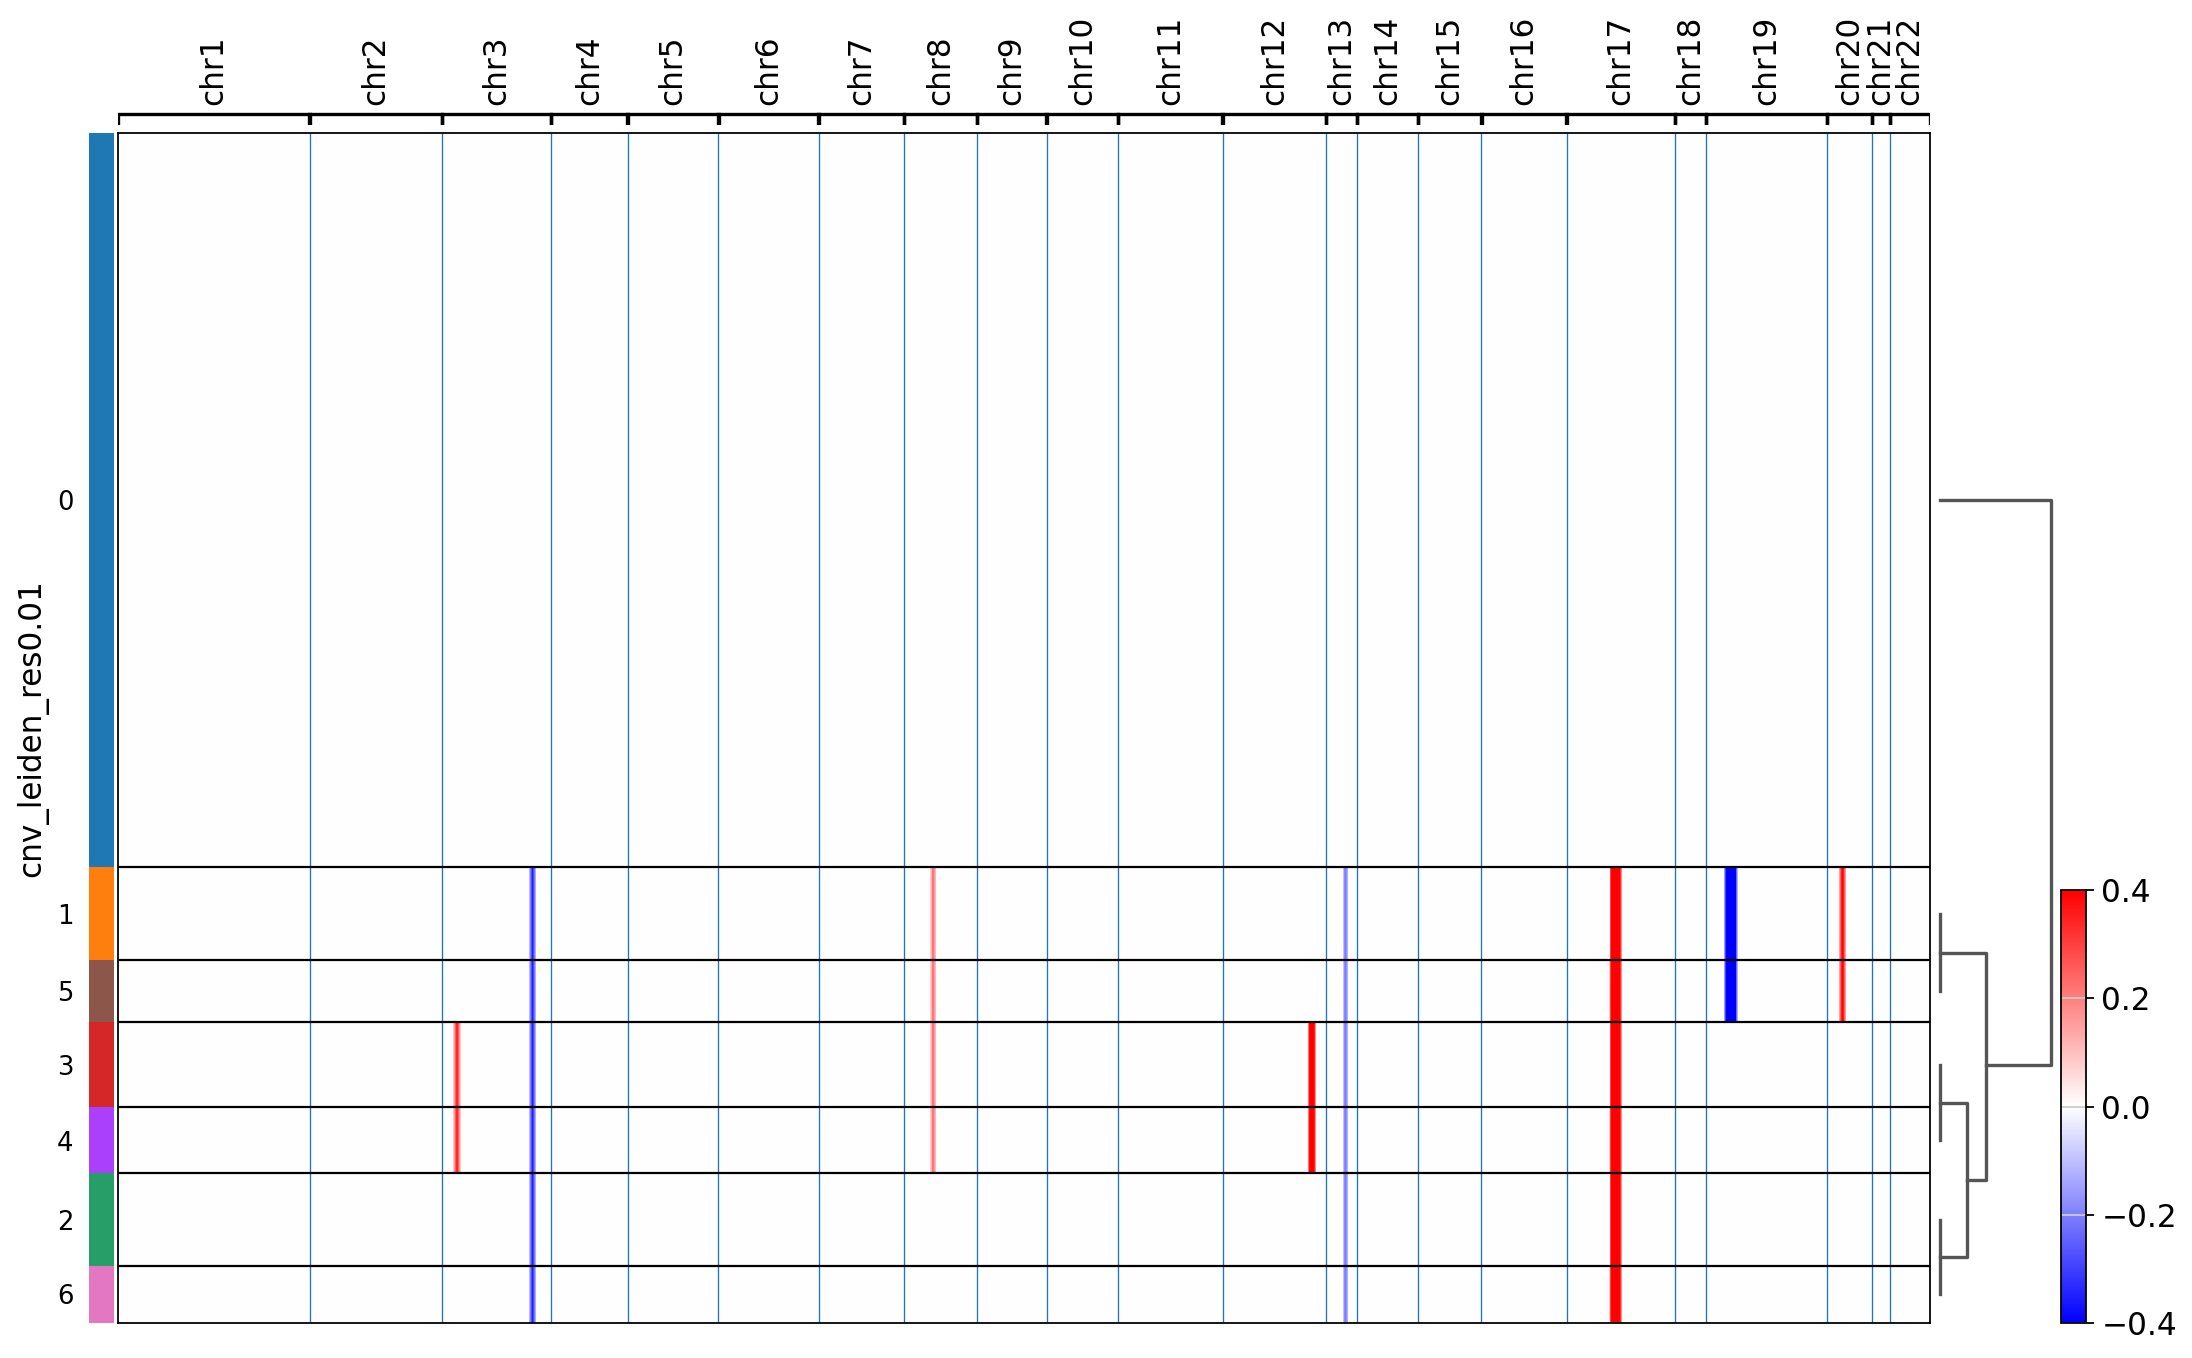

In [62]:
sc.tl.dendrogram(adata,groupby="cnv_leiden_res0.01")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden_res0.01", dendrogram=True,  vmax=0.4, vmin=-0.4)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


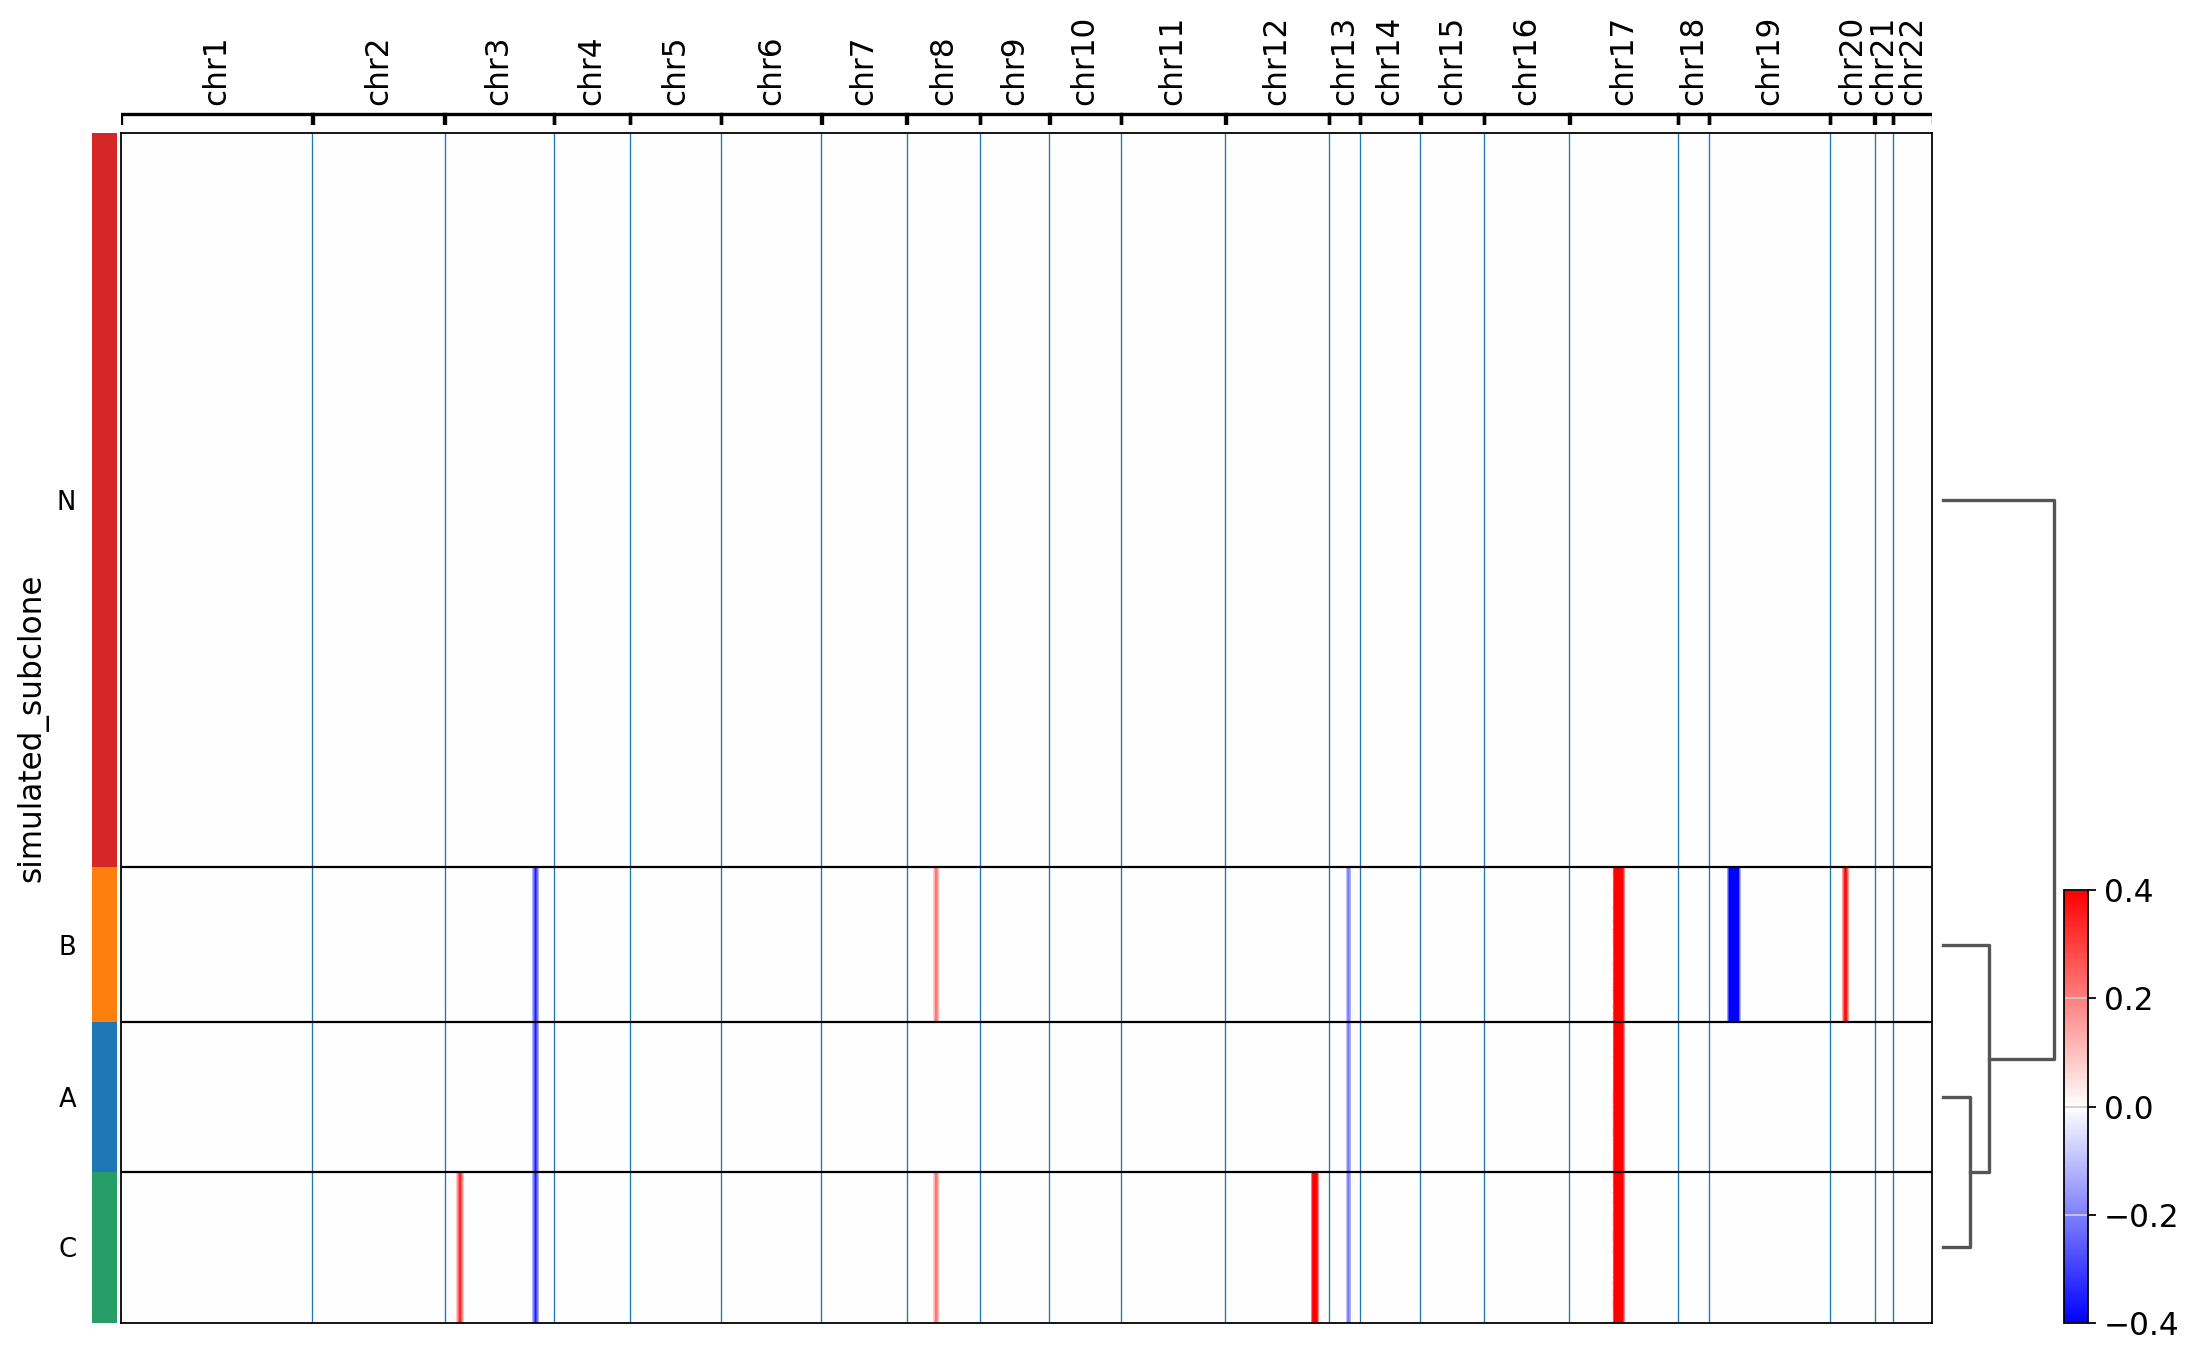

In [48]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmax=0.4, vmin=-0.4)

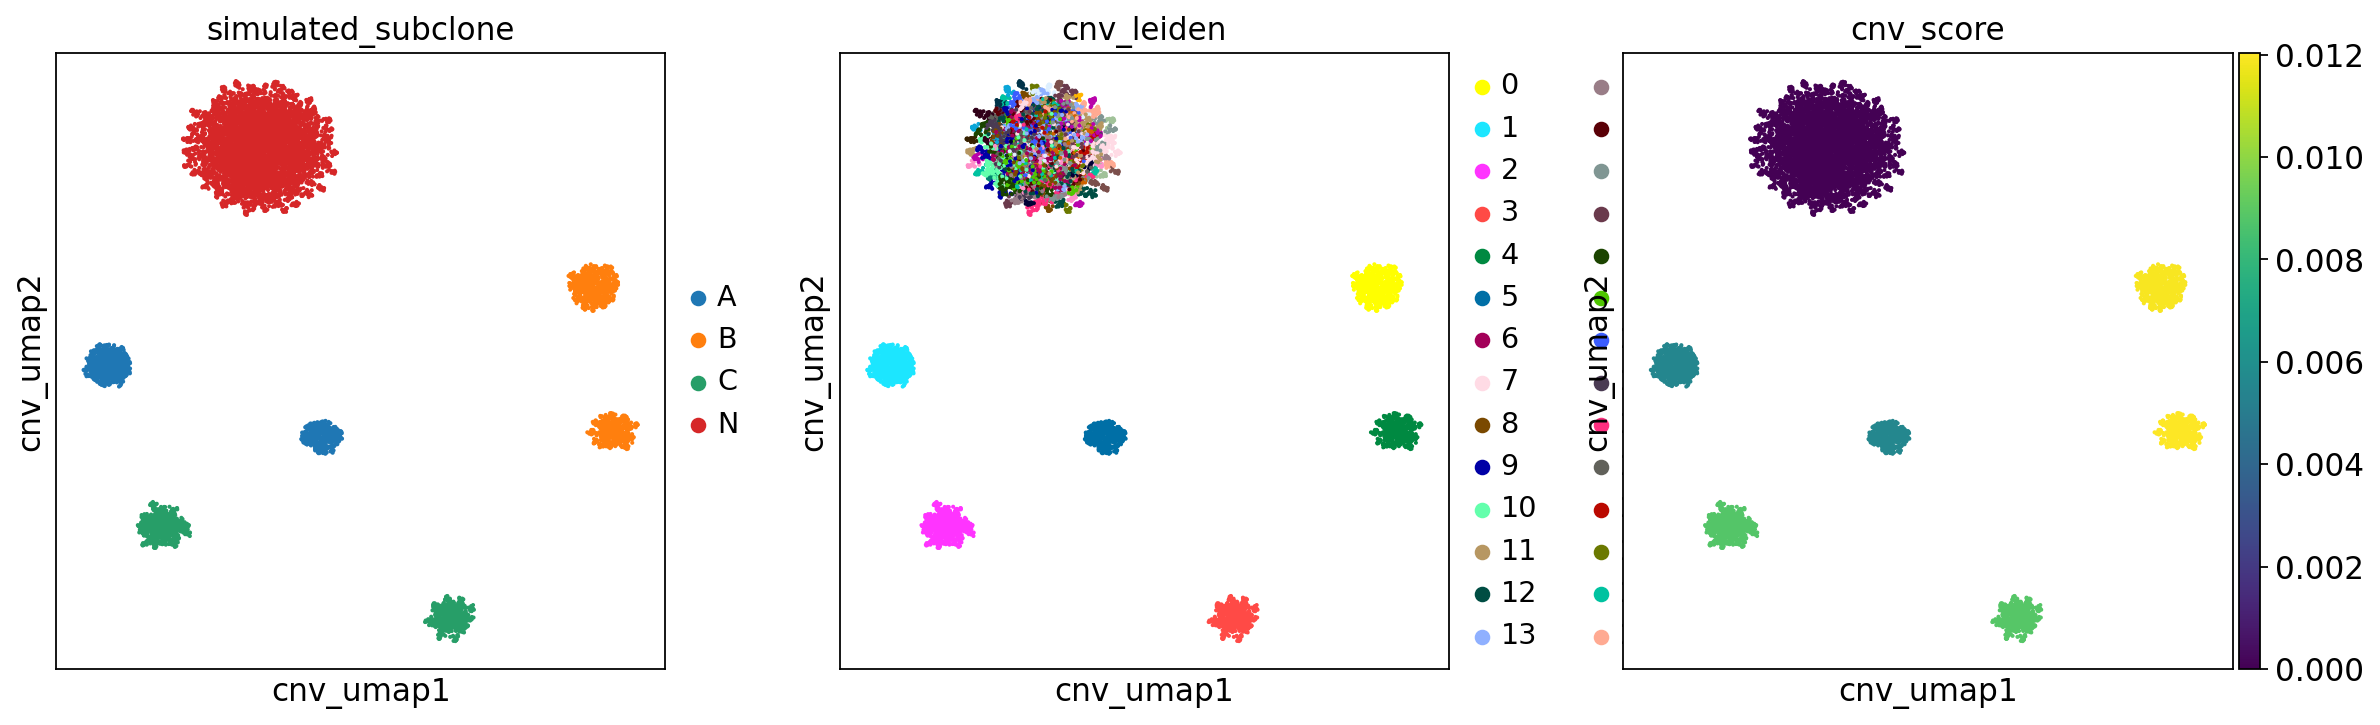

In [49]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata, groupby='cnv_leiden')
cnv.pl.umap(adata, color=['simulated_subclone', 'cnv_leiden','cnv_score'])

In [64]:
adata.obsm['X_cnv']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 176287 stored elements and shape (8892, 2274)>

In [66]:
import pandas as pd
pd.DataFrame(adata.obsm['X_cnv'].toarray()).to_csv("X_cnv.csv", index=False, header=False)

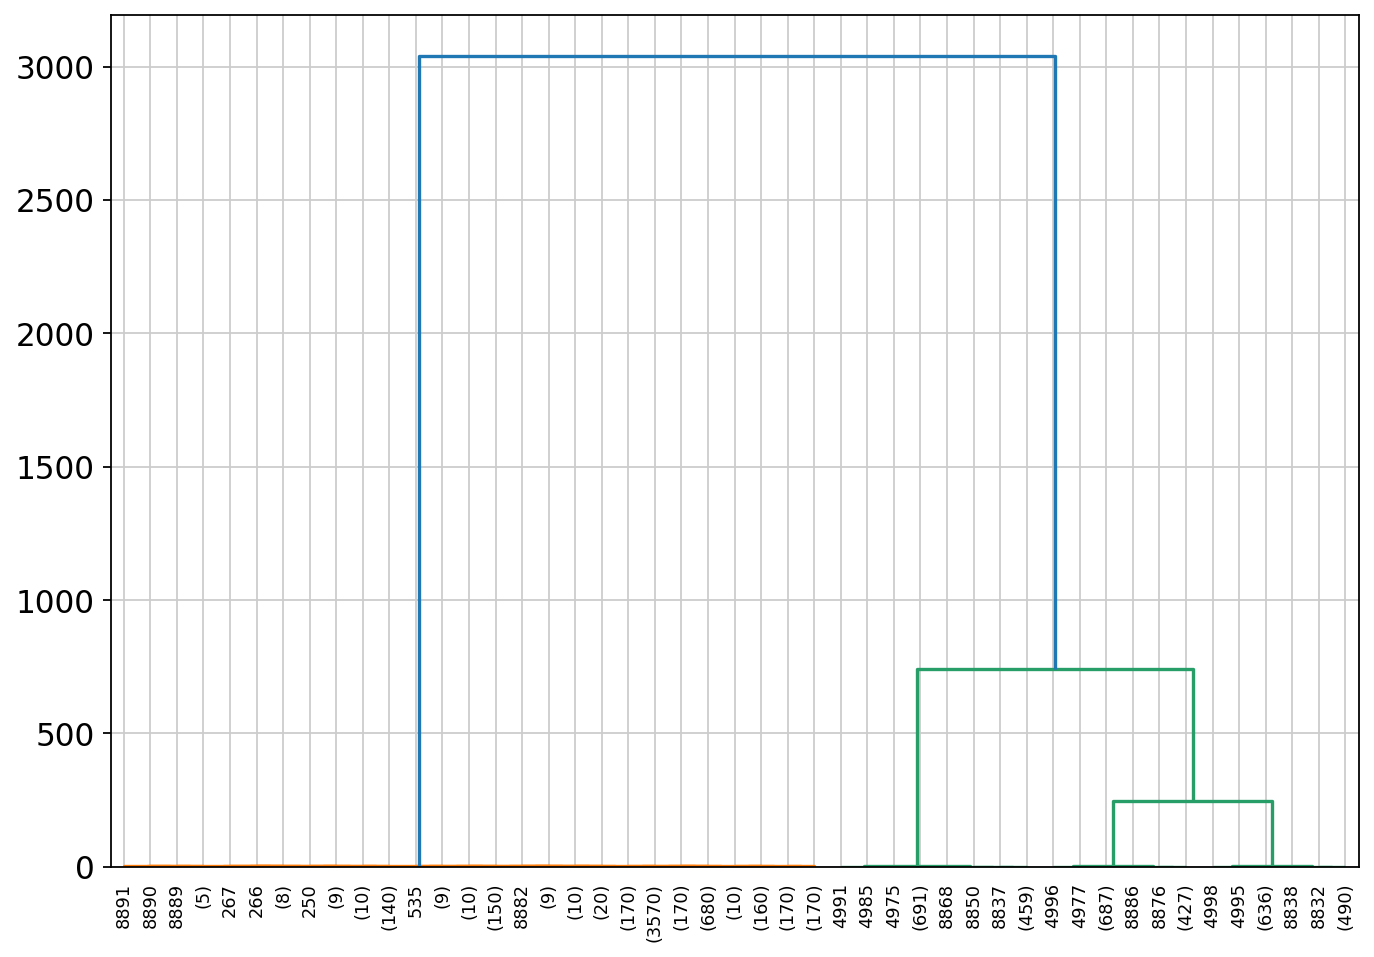

In [69]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

# Assuming `X` is your sparse matrix
X_normalized = normalize(csr_matrix(adata.obsm['X_cnv']), norm='l2', axis=1)

from sklearn.metrics.pairwise import cosine_distances

# Compute a pairwise distance matrix (cosine distance is suitable for normalized data)
distance_matrix = cosine_distances(X_normalized)

from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')  # You can also use 'average', 'complete', etc.

from scipy.cluster.hierarchy import dendrogram

# Visualize the dendrogram (for a smaller sample if needed)
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode="level", p=5)  # Adjust `p` for fewer branches
plt.show()


In [ ]:
adata

In [24]:
adata.layers['gene_values_cnv']

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [25]:
from scipy.sparse import csr_matrix, save_npz, load_npz

# Convert the array to a sparse matrix
gene_values_sparse = csr_matrix(adata.layers['gene_values_cnv'])

# Save the sparse matrix to a file
save_npz("gene_values_sparse.npz", gene_values_sparse)

In [26]:
# Load the sparse matrix
gene_values_sparse = load_npz("gene_values_sparse.npz")

In [27]:
gene_values_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7361082 stored elements and shape (6184, 22798)>

In [28]:
# Convert sparse matrix back to dense (only if needed, e.g., for certain clustering methods)
dense_array = gene_values_sparse.toarray()

In [29]:
dense_array

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [31]:
import numpy as np
# Count total elements
total_elements = dense_array.size

# Count NaN values
nan_count = np.isnan(dense_array).sum()

# Count non-NaN values
non_nan_count = total_elements - nan_count

print(f"Total elements: {total_elements}")
print(f"Number of NaN values: {nan_count}")
print(f"Number of non-NaN values: {non_nan_count}")


Total elements: 140982832
Number of NaN values: 5491392
Number of non-NaN values: 135491440


In [32]:
# Mask NaN values for analysis
finite_values = dense_array[np.isfinite(dense_array)]

# Find the top and lowest values
max_value = np.max(finite_values)
min_value = np.min(finite_values)

print(f"Highest value: {max_value}")
print(f"Lowest value: {min_value}")

Highest value: 0.10977227722772273
Lowest value: -0.18383168316831683


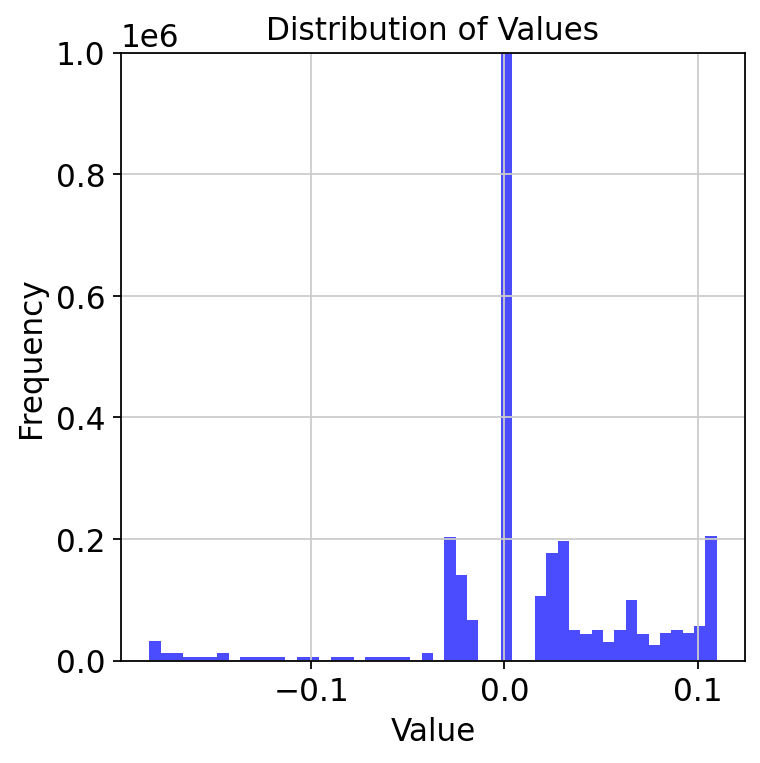

In [35]:
import matplotlib.pyplot as plt

plt.hist(finite_values, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim(top=10e5)
plt.show()


In [37]:
dense_array_rm = dense_array[~np.isnan(dense_array).any(axis=1), :]
dense_array_rm = dense_array[:, ~np.isnan(dense_array).any(axis=0)]

In [39]:
dense_array_rm.shape

(6184, 21910)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix
linkage_matrix = linkage(dense_array_rm, method='ward')  # 'ward' is a common method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=6)  # Adjust `p` to control depth
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Index or Sample Index")
plt.ylabel("Distance")
plt.show()

In [43]:
linkage_matrix

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 6.18400000e+03, 0.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 6.18500000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.23610000e+04, 1.23620000e+04, 2.31445516e+01, 1.26200000e+03],
       [1.23600000e+04, 1.23640000e+04, 6.68373587e+01, 5.53900000e+03],
       [1.23630000e+04, 1.23650000e+04, 1.00226843e+02, 6.18400000e+03]])

In [ ]:
dendrogram(linkage_matrix)

### Simulated

In [16]:
adata.X = adata.layers['Ms'].copy()

In [17]:
adata.obs.cell_type.unique()

['secretory cell', 'basal cell', 'ciliated cell']
Categories (3, object): ['ciliated cell', 'secretory cell', 'basal cell']

In [18]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    # reference_key="simulated_subclone",
    # reference_cat="N",
    reference_key="cell_type",
    reference_cat=['ciliated cell', 'secretory cell'], #'fibroblast', 'macrophage', 'lymphocyte', 'microcirculation associated smooth muscle cell', 'blood vessel smooth muscle cell', 'unknown'
    window_size=100
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.14s/it]


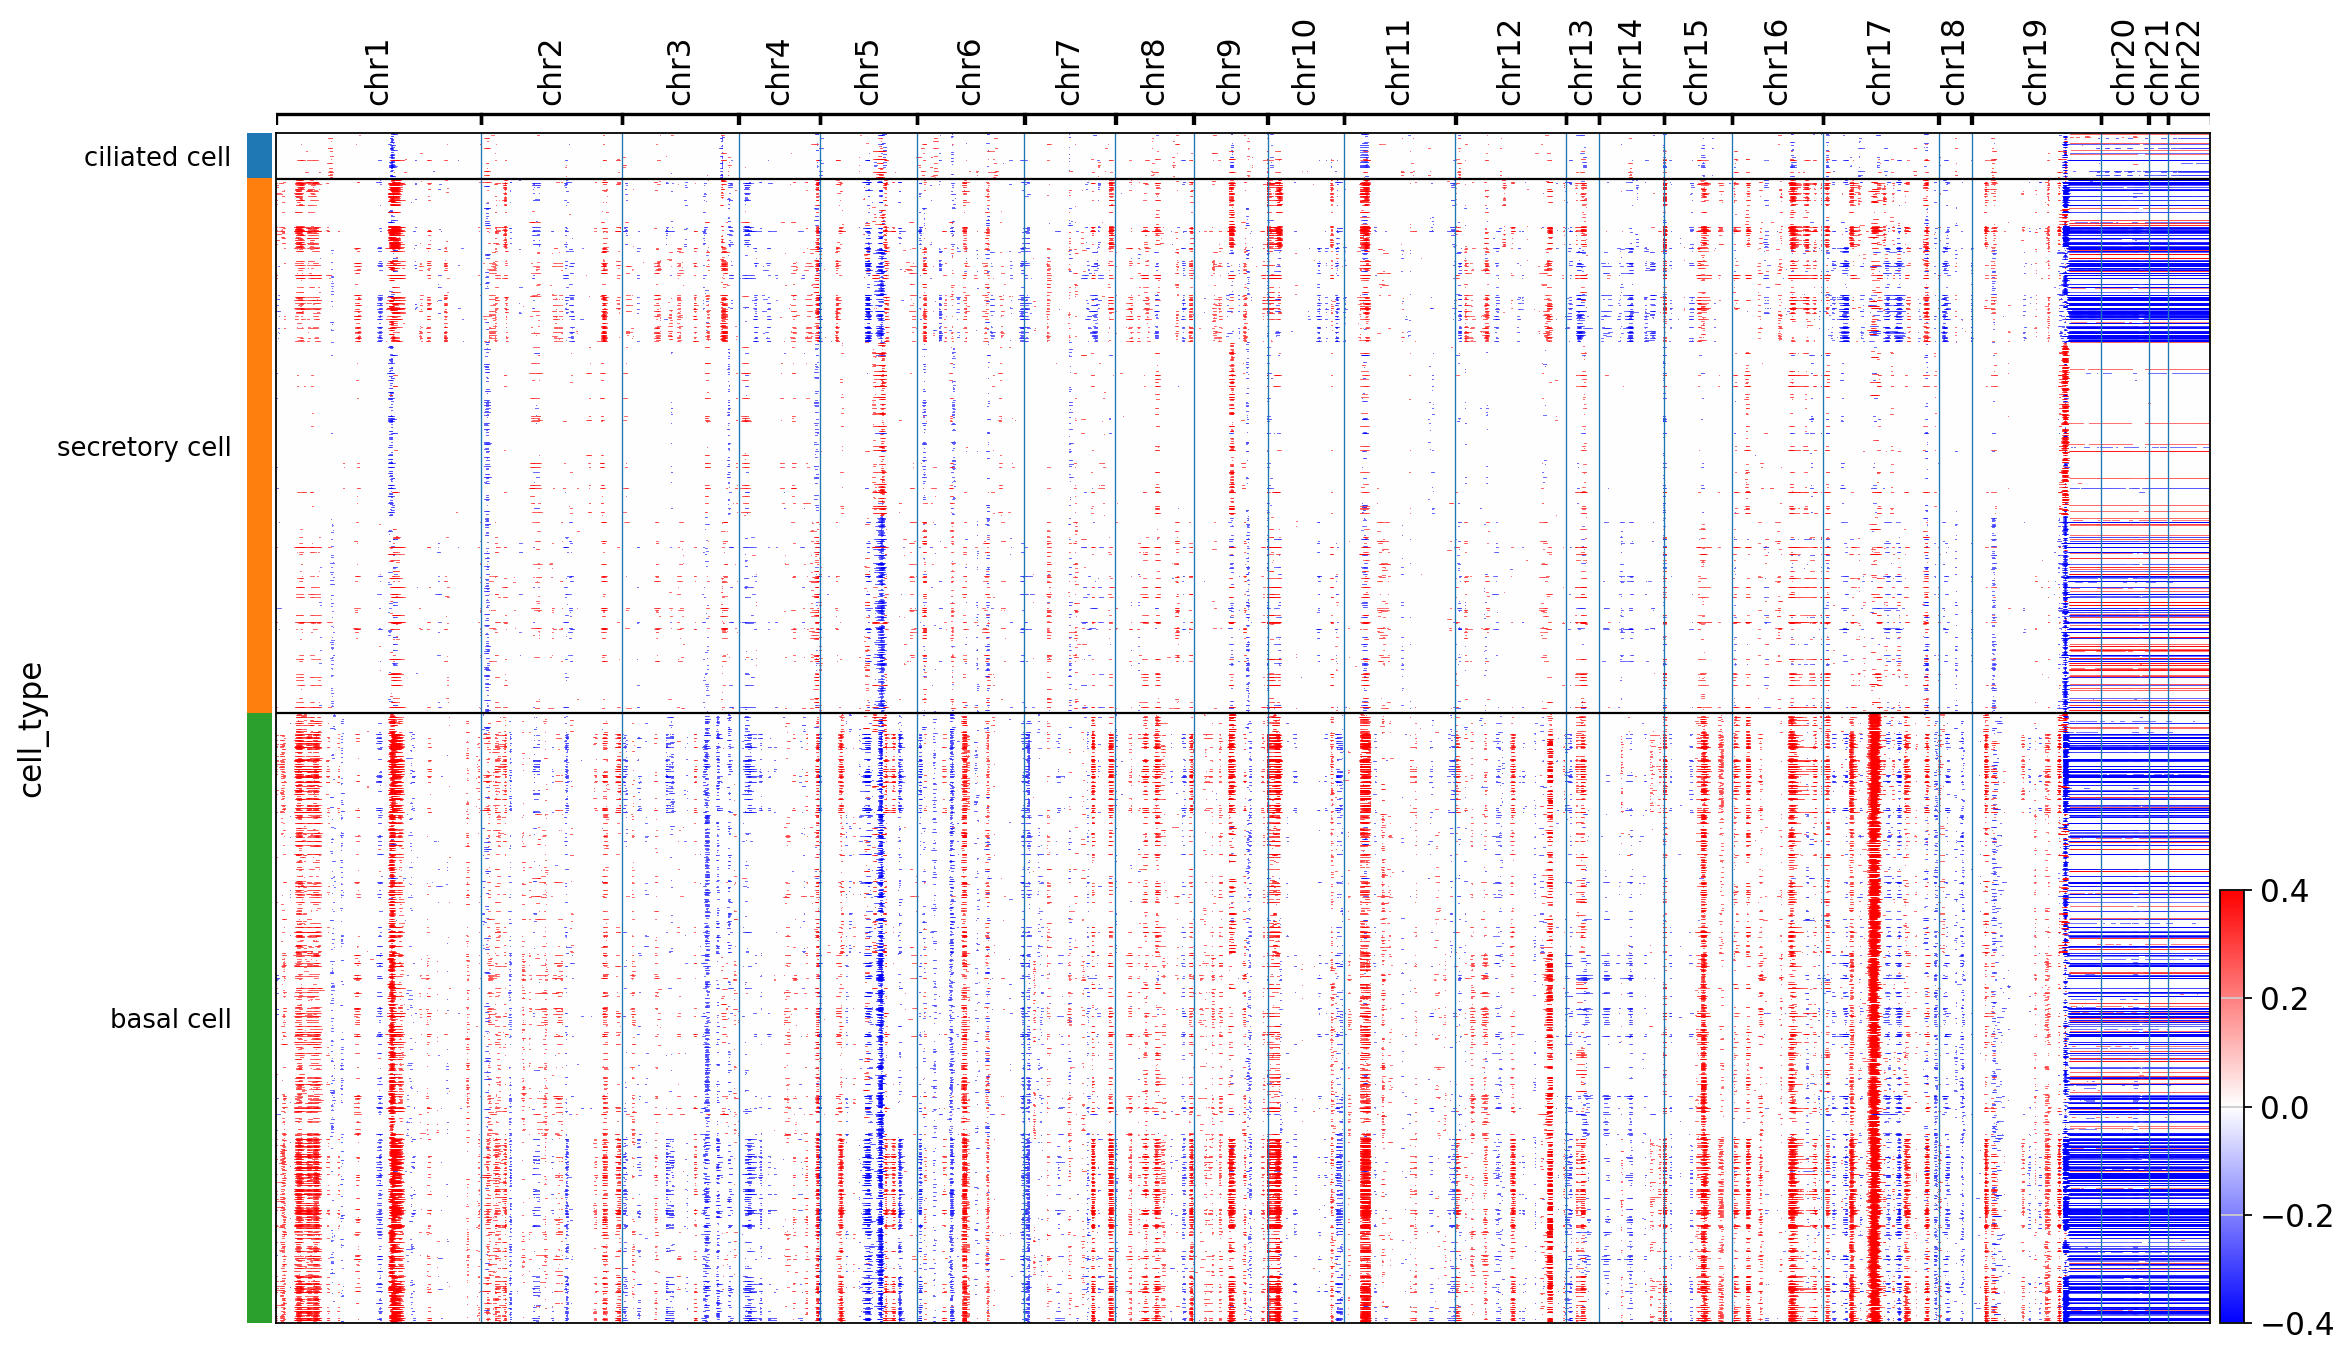

In [19]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmin=-0.4, vmax=0.4)

In [20]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

In [21]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


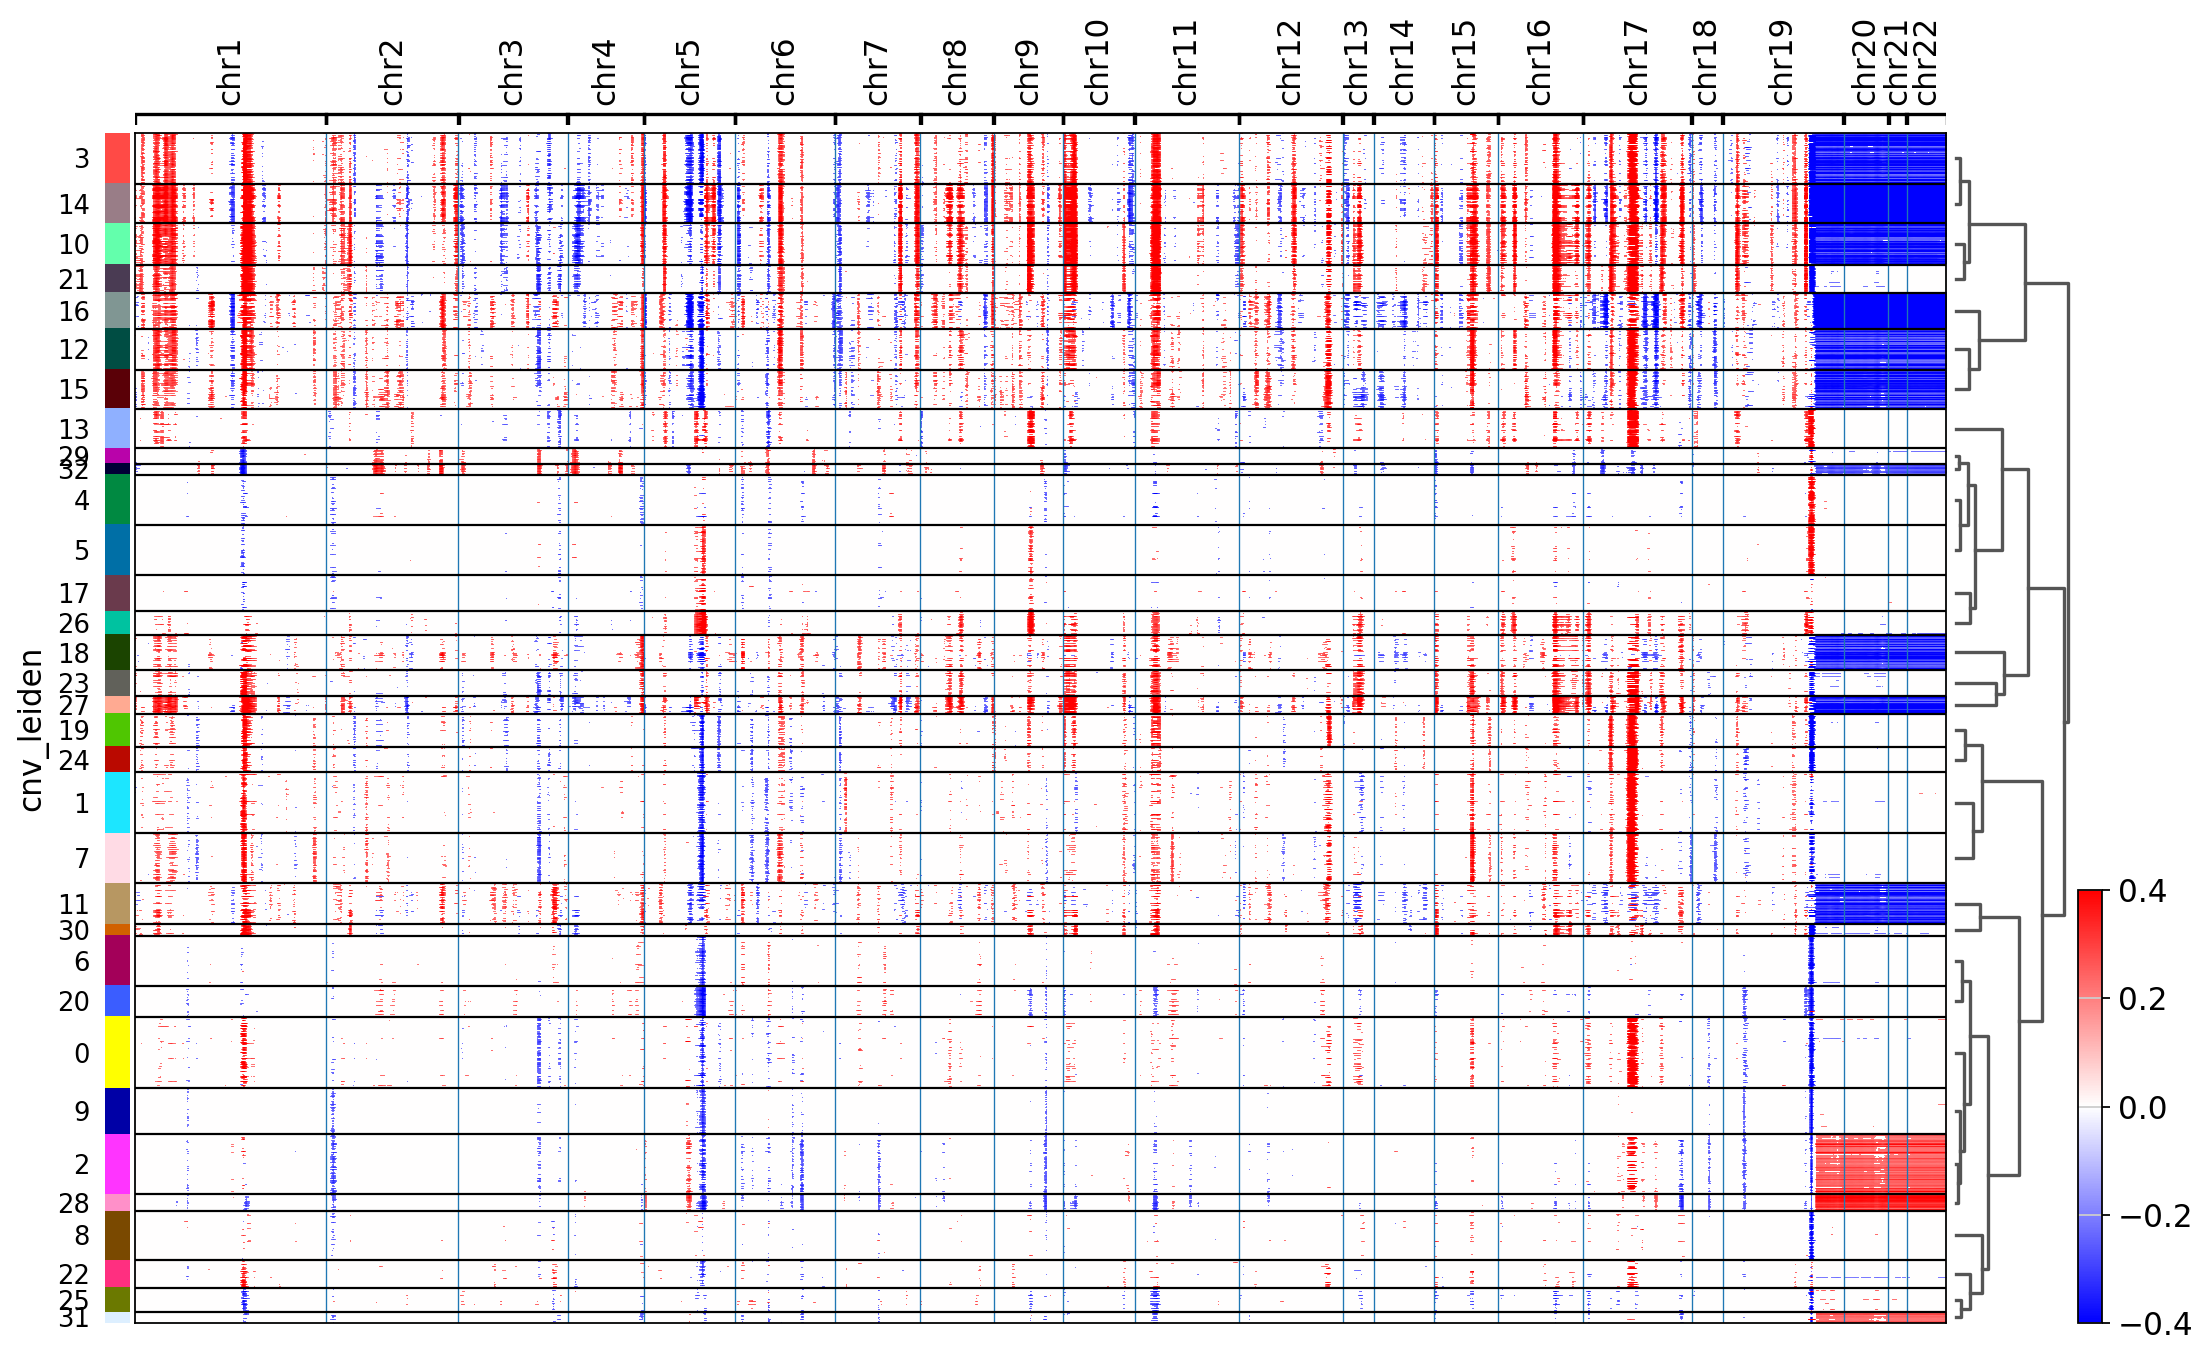

In [22]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True, vmin=-0.4, vmax=0.4)

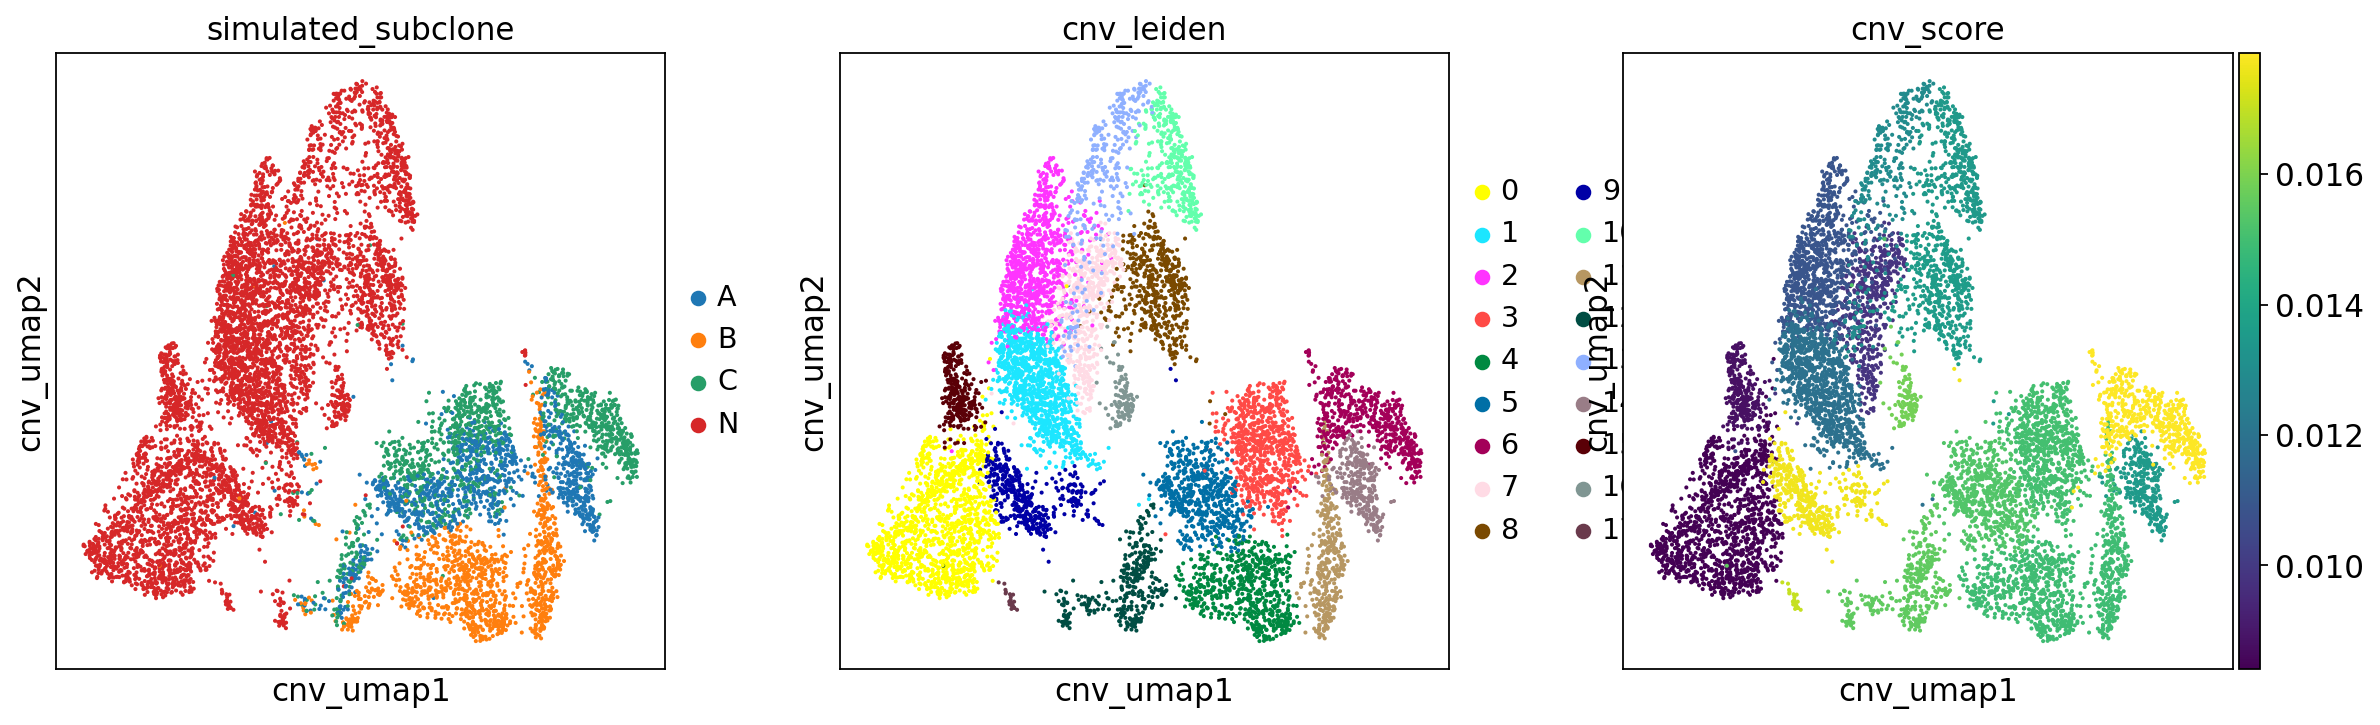

In [77]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata, groupby='cnv_leiden')
cnv.pl.umap(adata, color=['simulated_subclone', 'cnv_leiden','cnv_score'])

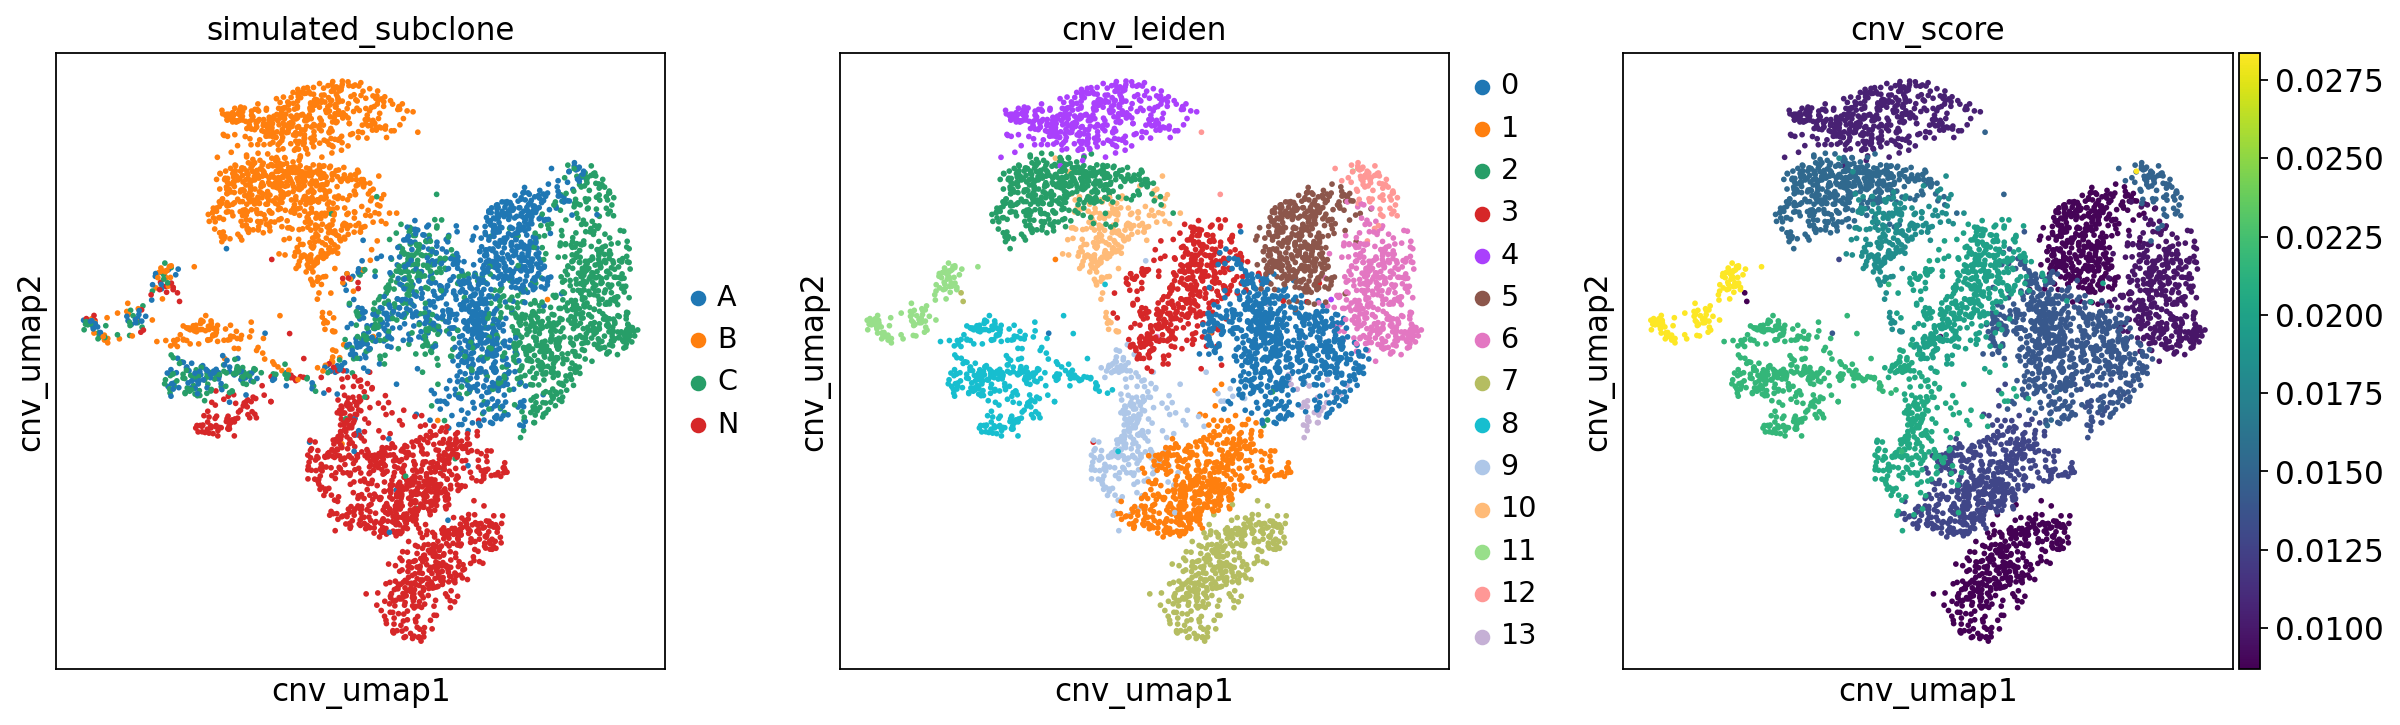

In [15]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata, groupby='cnv_leiden')
cnv.pl.umap(adata, color=['simulated_subclone', 'cnv_leiden','cnv_score'])

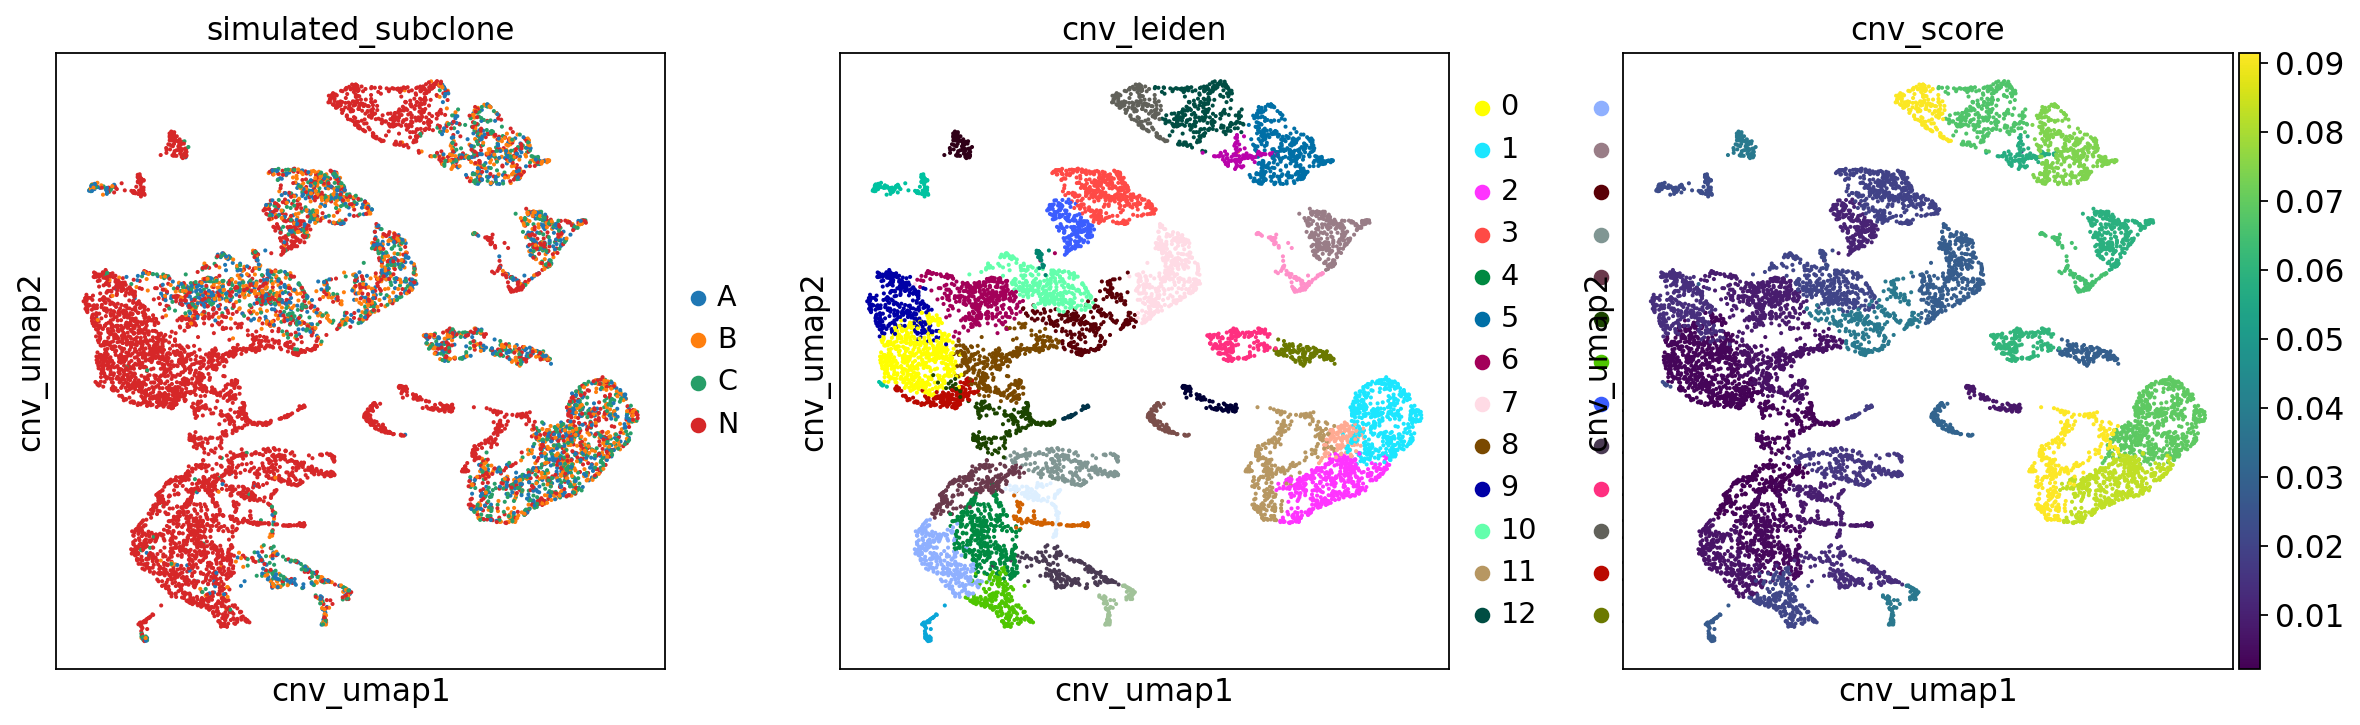

In [20]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata, groupby='cnv_leiden')
cnv.pl.umap(adata, color=['simulated_subclone', 'cnv_leiden','cnv_score'])

In [ ]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata, groupby='cnv_leiden')
cnv.pl.umap(adata, color=['simulated_subclone', 'cnv_leiden','cnv_score'])

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


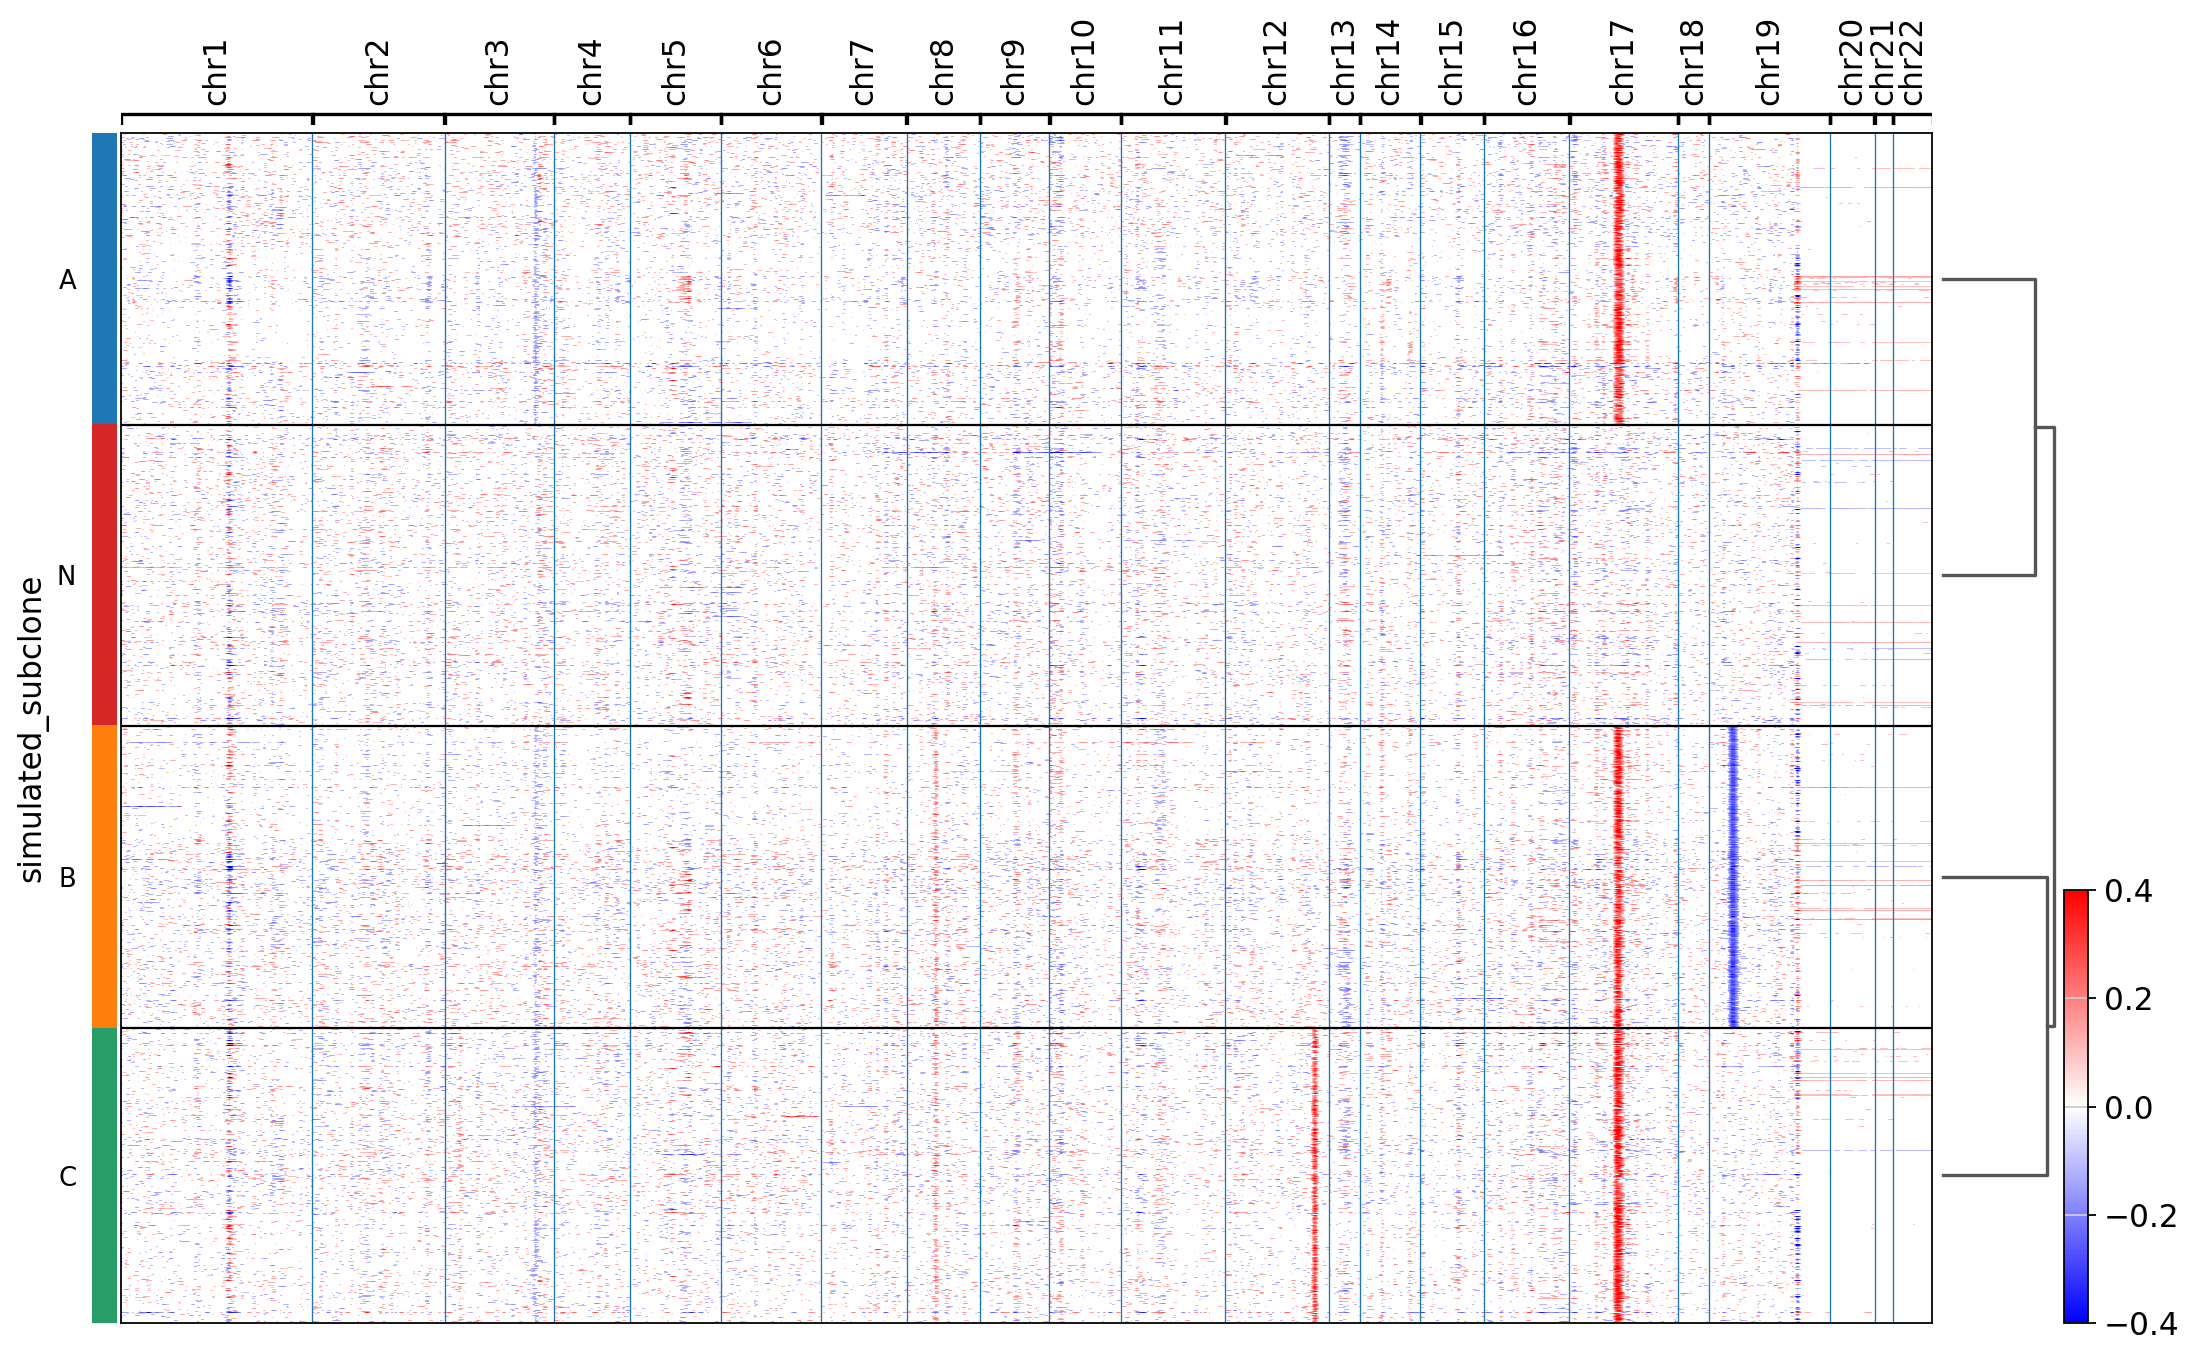

In [16]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmin=-0.4, vmax=0.4)

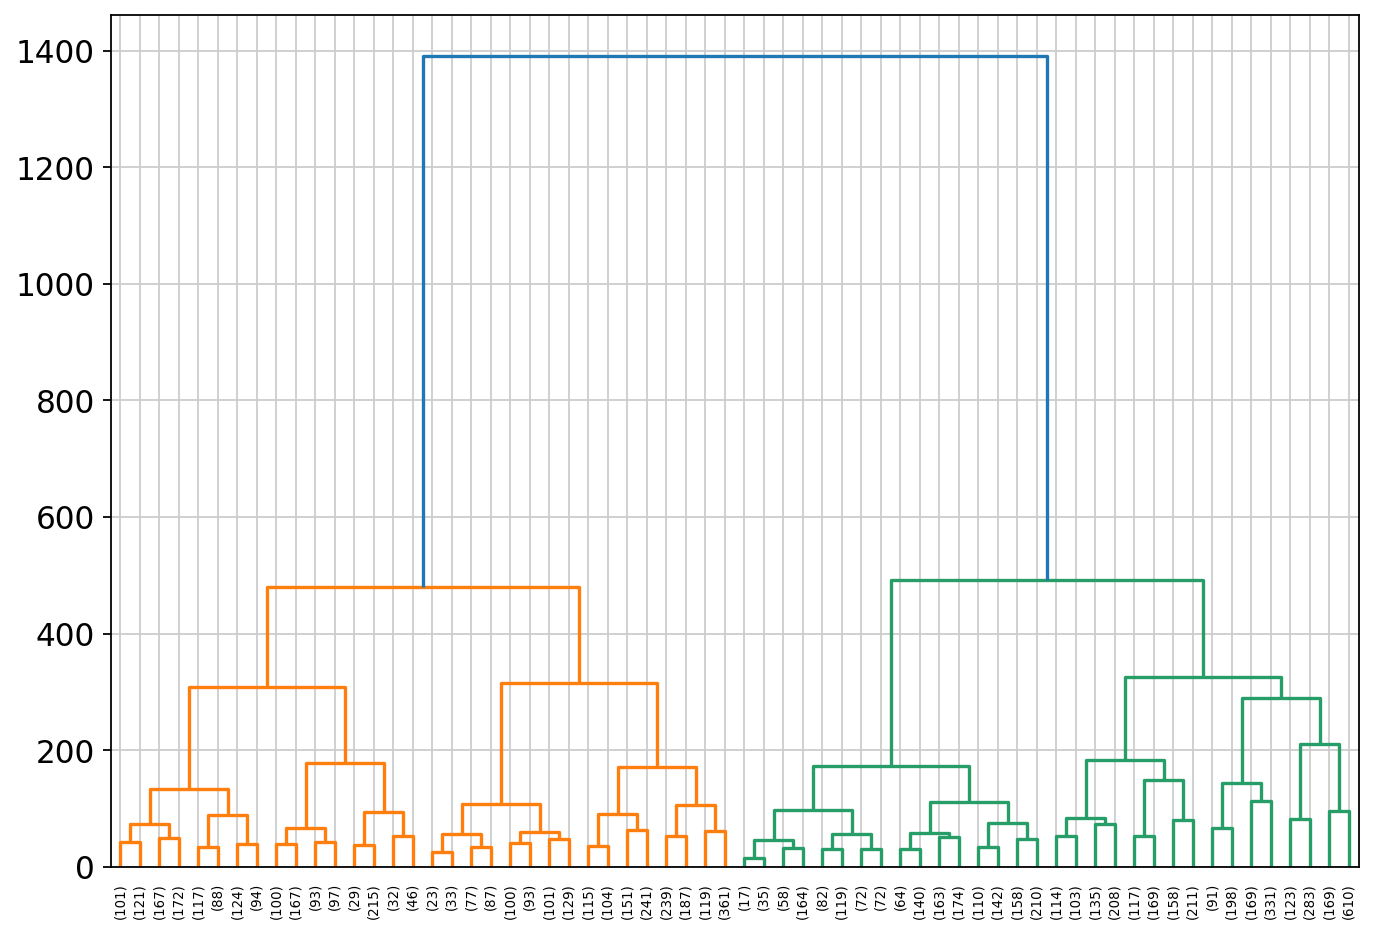

In [79]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

# Assuming `X` is your sparse matrix
X_normalized = normalize(csr_matrix(adata.obsm['X_cnv']), norm='l2', axis=1)

from sklearn.metrics.pairwise import cosine_distances

# Compute a pairwise distance matrix (cosine distance is suitable for normalized data)
distance_matrix = cosine_distances(X_normalized)

from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')  # You can also use 'average', 'complete', etc.

from scipy.cluster.hierarchy import dendrogram

# Visualize the dendrogram (for a smaller sample if needed)
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode="level", p=5)  # Adjust `p` for fewer branches
plt.show()

### Counts

In [ ]:
adata.X = adata.layers['counts'].copy()

In [ ]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    # reference_key="cell_type",
    # reference_cat="macrophage",
    window_size=100
)

In [ ]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type")

In [ ]:
cnv.pl.chromosome_heatmap_summary(adata, groupby='cell_type')

In [ ]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

In [ ]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

In [ ]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True)